In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection
import itertools


# Load Data

In [3]:
seed = 5
data_path = "ObesityDataSet_raw_and_data_sinthetic.csv"

In [4]:
from sklearn import preprocessing

# Read data
data = pd.read_csv(data_path, header=0)



to_encode = ['Gender', 'family_history_with_overweight', 'CAEC', 'SMOKE', 'FAVC', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
label_encoder = preprocessing.LabelEncoder()

df = data[to_encode]
df = df.apply(label_encoder.fit_transform)

data = data.drop(to_encode, axis=1)
data = pd.concat([data, df], axis=1)


data.describe()

# Last column represnets label, and others are features
features = np.array(data.iloc[:, 0:-1])
classes = np.array(data.iloc[:, -1])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8eda58eda0>,
      dtype=object)

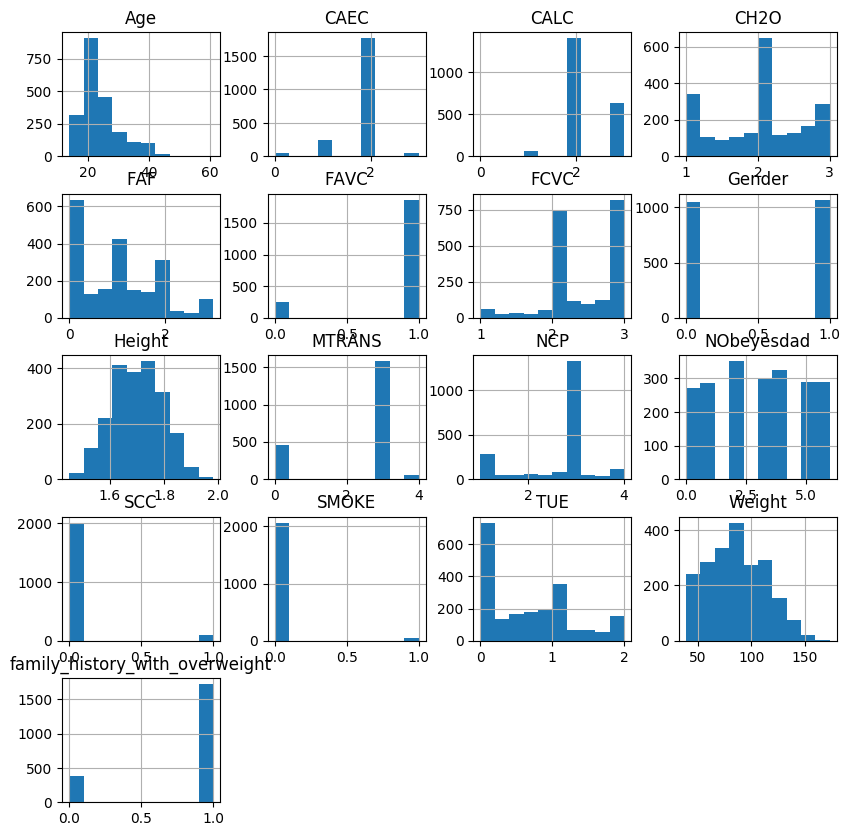

In [5]:
# draw hist for dataset
# data.hist(figsize=(12, 12))

data.iloc[:, 0:-1].hist(figsize=(12, 12))

In [ ]:
data.iloc[:, -1].hist(figsize=(12, 12), bins=13)

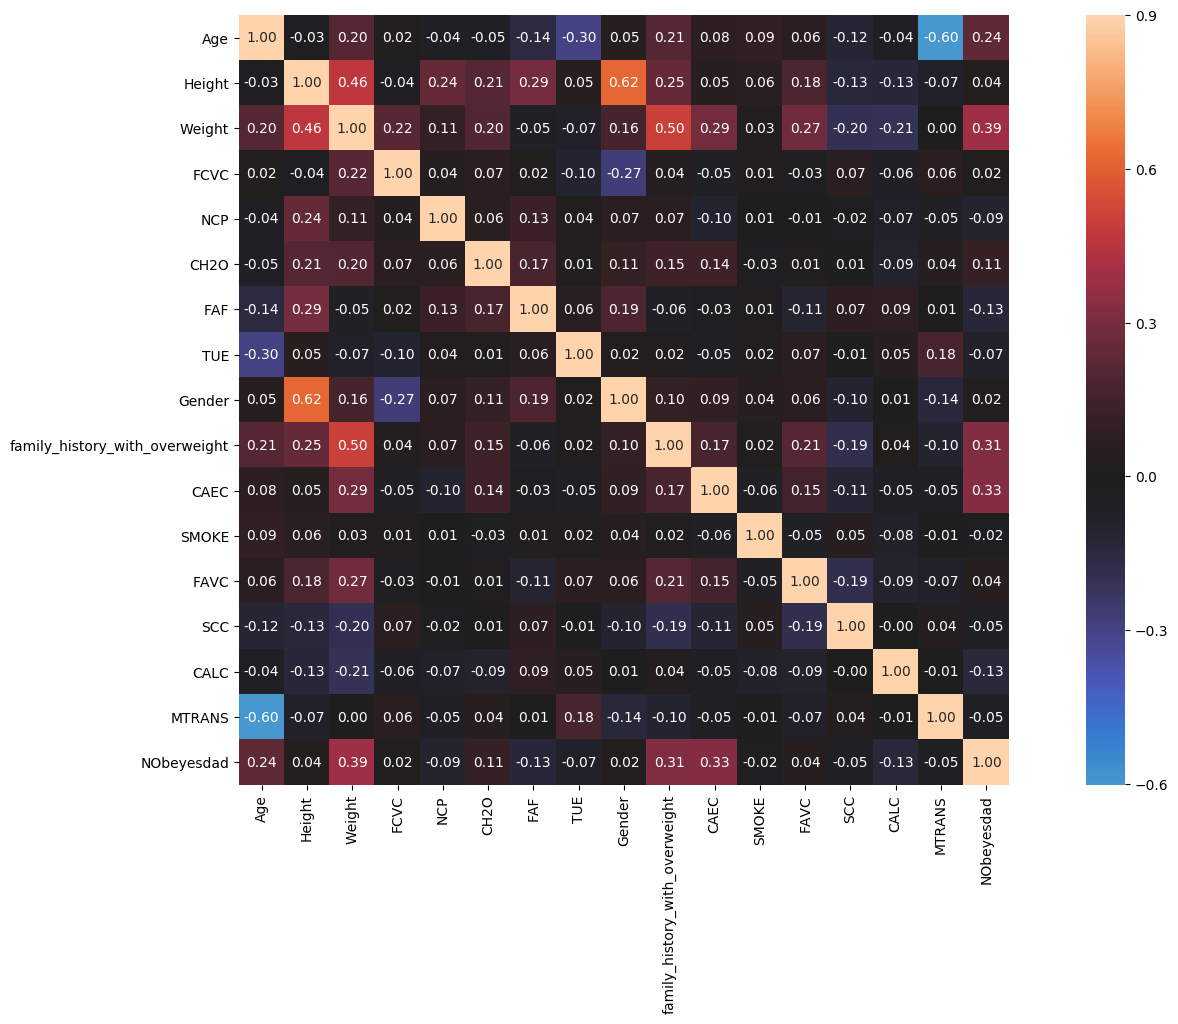

In [6]:
import seaborn as sns

plt.subplots(figsize=(20, 10))
sns.heatmap(data.corr(), vmax=.9, square=True, annot=True, fmt='.2f', center=0)
plt.show()


In [7]:
# split data
training_x, testing_x, training_y, testing_y = sklearn.model_selection.train_test_split(
features, classes, test_size=0.2, random_state=seed, stratify=classes)

In [8]:
print(training_x.shape)
print(testing_x.shape)
print(training_y.shape)
print(testing_y.shape)

(1688, 16)
(423, 16)
(1688,)
(423,)


In [9]:
from sklearn.preprocessing import StandardScaler

features = StandardScaler().fit_transform(features)
training_x = StandardScaler().fit_transform(training_x)
testing_x = StandardScaler().fit_transform(testing_x)


# Accuracy
### According to the fig above, the sample is not balanced (Death = 1 samples are significally fewer than Death = 0 samples), so we use "weighted" mode for accuracy calculating.

In [10]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.utils import compute_sample_weight

def balanced_accuracy(truth, pred):
    wts = compute_sample_weight('balanced', truth)
    return accuracy_score(truth, pred, sample_weight=wts)



# Section 2: Decision Tree

In [11]:
max_depth = np.arange(3, 50)
min_samples_split = [2,3,4]
min_samples_leaf = [2,3,4]
params = {'criterion': ['gini', 'entropy'], 'max_depth': max_depth, "min_samples_split": min_samples_split, "min_samples_leaf": min_samples_leaf
          }



Use grid search to find best params. Take a few minutes.

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import BaseEstimator


DecisionTree_classifier = DecisionTreeClassifier()

grid_seacher = sklearn.model_selection.GridSearchCV(DecisionTree_classifier, n_jobs=4, param_grid=params, 
                                                    refit=True, verbose=10, cv=5, scoring=make_scorer(accuracy_score))
grid_fit = grid_seacher.fit(training_x, training_y)


Fitting 5 folds for each of 846 candidates, totalling 4230 fits
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2 
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2 [CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2 [CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2 


[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2, score=0.6451612903225806, total=   0.0s
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2, score=0.6112759643916914, total=   0.0s
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2, score=0.6029411764705882, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2 [CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2, score=0.6160714285714286, total=   0.0s

[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2, score=0.6616766467065

[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=4 [CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=4, score=0.6029411764705882, total=   0.0s[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=2, score=0.7589285714285714, total=   0.0s


[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2 [CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=4 [CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=2 

[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=4, score=0.7705882352941177, total=   0.0s
[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=4, score=0.6201780415430267, total=   0.0s[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2, score=0.7634730538922155, total=   0.0s[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=2, score=0.7634730538922155, total=   0.0s[CV] cri

[Parallel(n_jobs=4)]: Batch computation too fast (0.0464s.) Setting batch_size=8.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Batch computation too fast (0.1371s.) Setting batch_size=22.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.2s


[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=4, score=0.7634730538922155, total=   0.0s

[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3, score=0.744807121661721, total=   0.0s[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=3, score=0.7507418397626113, total=   0.0s[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=2 [CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2 



[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=2, score=0.7705882352941177, total=   0.0s[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2, score=0.7917888563049853, total=   0.0s

[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3, score=0.7589285714285714, total=   0.0s[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=2 [CV] c

[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=3 [CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3 [CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4 


[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=3, score=0.8176470588235294, total=   0.0s[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3, score=0.7724550898203593, total=   0.0s[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4, score=0.811377245508982, total=   0.0s


[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=3 [CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4 
[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2 

[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4, score=0.7917888563049853, total=   0.0s[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=3, score=0.8189

[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=3, score=0.8931750741839762, total=   0.0s[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=4, score=0.9020771513353115, total=   0.0s

[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=3 [CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=4 

[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2, score=0.8922155688622755, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=3, score=0.8482142857142857, total=   0.0s[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=4, score=0.8571428571428571, total=   0.0s

[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=3 [CV] criterion=gini, max_depth=6, min_samples_

[Parallel(n_jobs=4)]: Done 108 tasks      | elapsed:    0.6s


[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=3, score=0.8973607038123167, total=   0.0s[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=4, score=0.906158357771261, total=   0.0s
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2, score=0.8529411764705882, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=3 
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=4 
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2 

[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=3, score=0.85, total=   0.0s[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=4, score=0.8470588235294118, total=   0.0s
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2, score=0.9169139465875371, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=3 
[CV] criterion=gini,

[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=4, score=0.9221556886227545, total=   0.0s[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=3 [CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=2, score=0.8898809523809523, total=   0.0s


[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=2 [CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2 

[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=3, score=0.9136904761904762, total=   0.0s
[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=2, score=0.8982035928143712, total=   0.0s[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2, score=0.9266862170087976, total=   0.0s[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=3 


[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=3 [CV] criterion=gini, max_depth=8, min_samples_

[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=2, score=0.8764705882352941, total=   0.0s[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=4, score=0.9166666666666666, total=   0.0s[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=3, score=0.8823529411764706, total=   0.0s


[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=2 [CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=4 [CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=3 


[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=4, score=0.9131736526946108, total=   0.0s[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=2, score=0.9406528189910979, total=   0.0s[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=3, score=0.9584569732937686, total=   0.0s


[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=2 [CV] 

[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2 [CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2 [CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=4 




[Parallel(n_jobs=4)]: Done 262 tasks      | elapsed:    1.3s


[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2, score=0.9088235294117647, total=   0.0s[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2, score=0.9101796407185628, total=   0.0s[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=4, score=0.8823529411764706, total=   0.0s


[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=3 [CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2 [CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=4 


[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2, score=0.9525222551928784, total=   0.0s[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=3, score=0.9237536656891495, total=   0.0s[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=4, score=0.9554896142433235, total=   0.0s


[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2 [C

[CV]  criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=3, score=0.9136904761904762, total=   0.0s[CV]  criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=4, score=0.9311377245508982, total=   0.0s[CV]  criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=2, score=0.9406528189910979, total=   0.0s


[CV] criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=3 [CV] criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=2 [CV] criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=2 


[CV]  criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=3, score=0.9191616766467066, total=   0.0s[CV]  criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=2, score=0.9325513196480938, total=   0.0s[CV]  criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=2, score=0.9077380952380952, total=   0.0s


[CV] criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_spl

[CV]  criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=4, score=0.9436201780415431, total=   0.0s
[CV] criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=2, score=0.9029411764705882, total=   0.0s[CV]  criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=3, score=0.9465875370919882, total=   0.0s

[CV] criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=2 [CV] criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=3 

[CV]  criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=4, score=0.9077380952380952, total=   0.0s
[CV] criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=4 [CV]  criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=2, score=0.9614243323442137, total=   0.0s
[CV]  criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=3, score=0.9077380952380952, total=   

[CV]  criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=4, score=0.9221556886227545, total=   0.0s[CV]  criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=4, score=0.8970588235294118, total=   0.0s

[CV] criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=2 [CV] criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=4 [CV]  criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=3, score=0.9413489736070382, total=   0.0s


[CV] criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=4, score=0.9495548961424333, total=   0.0s[CV]  criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=2, score=0.9296187683284457, total=   0.0s[CV]  criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=3, score=0.8823529411764706, total=   0.0s


[CV] criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_spl

[CV]  criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=2, score=0.9166666666666666, total=   0.0s[CV]  criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=3, score=0.9221556886227545, total=   0.0s[CV]  criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=4, score=0.9465875370919882, total=   0.0s


[CV] criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=4 [CV] criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=4 [CV] criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=2 


[CV]  criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=4, score=0.9077380952380952, total=   0.0s[CV]  criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=2, score=0.9311377245508982, total=   0.0s[CV]  criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=4, score=0.9296187683284457, total=   0.0s


[CV] criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_spl

[Parallel(n_jobs=4)]: Done 460 tasks      | elapsed:    2.4s


[CV] criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=4 

[CV]  criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=3, score=0.9047619047619048, total=   0.0s[CV]  criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=4, score=0.8911764705882353, total=   0.0s

[CV] criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=3 [CV] criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=4 

[CV]  criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=3, score=0.9041916167664671, total=   0.0s[CV]  criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=4, score=0.9495548961424333, total=   0.0s

[CV] criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=4 [CV] criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=3 

[CV]  criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=4, score=0.9136904761904762, total=   0.0s[CV]  criterion=gini, max_depth=14,

[CV]  criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=4, score=0.9077380952380952, total=   0.0s[CV]  criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=2, score=0.9058823529411765, total=   0.0s

[CV] criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=4 [CV] criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=2 

[CV]  criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=4, score=0.9041916167664671, total=   0.0s[CV]  criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=2, score=0.9495548961424333, total=   0.0s

[CV] criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=2 [CV] criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=2 

[CV]  criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=2, score=0.9325513196480938, total=   0.0s[CV]  criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=2, score=0.9077380952380952, total=   

[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=4, score=0.7917888563049853, total=   0.0s
[CV] criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=3 [CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=4 

[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=4, score=0.7705882352941177, total=   0.0s[CV]  criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=3, score=0.9281437125748503, total=   0.0s


[CV] criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=4 [CV] criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=3, score=0.9406528189910979, total=   0.0s[CV]  criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=4, score=0.9237536656891495, total=   0.0s

[CV] criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=3 [CV] criterion=gini, max_depth=16, min_

[CV]  criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=4, score=0.8823529411764706, total=   0.0s[CV]  criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=3, score=0.9029411764705882, total=   0.0s

[CV] criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=4 [CV] criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=3 

[CV]  criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=3, score=0.9584569732937686, total=   0.0s[CV]  criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=4, score=0.9465875370919882, total=   0.0s

[CV] criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=4 [CV] criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=3 

[CV]  criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=3, score=0.9196428571428571, total=   0.0s[CV]  criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=4, score=0.9077380952380952, total=   

[CV]  criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=2, score=0.9221556886227545, total=   0.0s[CV]  criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=3, score=0.907185628742515, total=   0.0s

[CV] criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=3 [CV] criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=4 

[CV]  criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=3, score=0.9266862170087976, total=   0.0s[CV]  criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=4, score=0.9237536656891495, total=   0.0s

[CV] criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=3 [CV] criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=4 

[CV]  criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=3, score=0.9029411764705882, total=   0.0s[CV]  criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=4, score=0.9, total=   0.0s

[CV] crite

[Parallel(n_jobs=4)]: Done 644 tasks      | elapsed:    3.9s



[CV] criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=2, score=0.9058823529411765, total=   0.0s
[CV] criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=2, score=0.9525222551928784, total=   0.0s
[CV] criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=2, score=0.9136904761904762, total=   0.0s
[CV] criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=2, score=0.9161676646706587, total=   0.0s
[CV] criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=3, score=0.9325513196480938, total=   0.0s
[CV] criterion=gini, max_depth=19,

[CV] criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=4 [CV] criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=3, score=0.9525222551928784, total=   0.0s
[CV] criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=3, score=0.9226190476190477, total=   0.0s
[CV] criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=3, score=0.9341317365269461, total=   0.0s
[CV] criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=4, score=0.9413489736070382, total=   0.0s
[CV] criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=4, 

[CV] criterion=gini, max_depth=21, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=2, min_samples_split=4, score=0.9077380952380952, total=   0.0s
[CV] criterion=gini, max_depth=21, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=2, min_samples_split=4, score=0.9191616766467066, total=   0.0s[CV] criterion=gini, max_depth=21, min_samples_leaf=4, min_samples_split=2 

[CV] criterion=gini, max_depth=21, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=4, min_samples_split=2, score=0.9495548961424333, total=   0.0s
[CV]  criterion=gini, max_depth=21, min_samples_leaf=3, min_samples_split=2, score=0.9237536656891495, total=   0.0s[CV] criterion=gini, max_depth=21, min_samples_leaf=4, min_samples_split=2 

[CV] criterion=gini, max_depth=21, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=4, min_samples_split=2,

[CV] criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=4 [CV] criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=3 

[CV]  criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=4, score=0.9584569732937686, total=   0.0s[CV]  criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=3, score=0.9436201780415431, total=   0.0s

[CV] criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=4 [CV] criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=3 

[CV]  criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=3, score=0.9136904761904762, total=   0.0s[CV]  criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=4, score=0.9107142857142857, total=   0.0s

[CV] criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=4 [CV] criterion=gini, max_depth=22, min_samples_leaf=4, min_samples_split=2 

[CV]  criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=4,

[Parallel(n_jobs=4)]: Batch computation too slow (2.0159s.) Setting batch_size=11.


[CV]  criterion=gini, max_depth=22, min_samples_leaf=4, min_samples_split=4, score=0.9058823529411765, total=   0.0s

[CV] criterion=gini, max_depth=22, min_samples_leaf=3, min_samples_split=4 [CV] criterion=gini, max_depth=22, min_samples_leaf=4, min_samples_split=4 

[CV]  criterion=gini, max_depth=22, min_samples_leaf=4, min_samples_split=4, score=0.9406528189910979, total=   0.0s[CV]  criterion=gini, max_depth=22, min_samples_leaf=3, min_samples_split=4, score=0.9354838709677419, total=   0.0s

[CV] criterion=gini, max_depth=22, min_samples_leaf=4, min_samples_split=4 [CV] criterion=gini, max_depth=22, min_samples_leaf=3, min_samples_split=4 

[CV]  criterion=gini, max_depth=22, min_samples_leaf=3, min_samples_split=4, score=0.9029411764705882, total=   0.0s[CV]  criterion=gini, max_depth=22, min_samples_leaf=4, min_samples_split=4, score=0.9077380952380952, total=   0.0s

[CV] criterion=gini, max_depth=22, min_samples_leaf=3, min_samples_split=4 [CV] criterion=gini, max_depth=22, 

[CV]  criterion=gini, max_depth=23, min_samples_leaf=4, min_samples_split=3, score=0.9376854599406528, total=   0.0s
[CV] criterion=gini, max_depth=23, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=4, min_samples_split=3, score=0.9047619047619048, total=   0.0s
[CV] criterion=gini, max_depth=23, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=4, min_samples_split=3, score=0.9041916167664671, total=   0.0s
[CV] criterion=gini, max_depth=23, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=4, min_samples_split=4, score=0.9296187683284457, total=   0.0s
[CV] criterion=gini, max_depth=23, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=4, min_samples_split=4, score=0.9029411764705882, total=   0.0s
[CV] criterion=gini, max_depth=23, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=23,

[Parallel(n_jobs=4)]: Done 886 tasks      | elapsed:    7.0s




[CV] criterion=gini, max_depth=24, min_samples_leaf=3, min_samples_split=3 [CV] criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=4 

[CV]  criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=4, score=0.8852941176470588, total=   0.0s[CV]  criterion=gini, max_depth=24, min_samples_leaf=3, min_samples_split=3, score=0.9554896142433235, total=   0.0s


[CV] criterion=gini, max_depth=24, min_samples_leaf=3, min_samples_split=3 [CV] criterion=gini, max_depth=24, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=24, min_samples_leaf=3, min_samples_split=3, score=0.9166666666666666, total=   0.0s[CV]  criterion=gini, max_depth=24, min_samples_leaf=3, min_samples_split=4, score=0.9251497005988024, total=   0.0s

[CV] criterion=gini, max_depth=24, min_samples_leaf=4, min_samples_split=2 [CV] criterion=gini, max_depth=24, min_samples_leaf=3, min_samples_split=3 

[CV]  criterion=gini, max_depth=24, min_samples_leaf=4, min_samples_split=

[CV] criterion=gini, max_depth=25, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=4, score=0.9281437125748503, total=   0.0s[CV]  criterion=gini, max_depth=25, min_samples_leaf=3, min_samples_split=3, score=0.9584569732937686, total=   0.0s

[CV] criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=2 [CV] criterion=gini, max_depth=25, min_samples_leaf=3, min_samples_split=3 

[CV]  criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=2, score=0.9296187683284457, total=   0.0s[CV]  criterion=gini, max_depth=25, min_samples_leaf=3, min_samples_split=3, score=0.9136904761904762, total=   0.0s

[CV] criterion=gini, max_depth=25, min_samples_leaf=3, min_samples_split=3 [CV] criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=2 

[CV]  criterion=gini, max_depth=25, min_samples_leaf=3, min_samples_split=3, score=0.9251497005988024, total=   0.0s[CV]  criterion=gini, max_depth=20, 

[CV]  criterion=gini, max_depth=26, min_samples_leaf=2, min_samples_split=3, score=0.9436201780415431, total=   0.0s[CV] criterion=gini, max_depth=25, min_samples_leaf=4, min_samples_split=4 

[CV] criterion=gini, max_depth=26, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=4, min_samples_split=4, score=0.9077380952380952, total=   0.0s
[CV]  criterion=gini, max_depth=26, min_samples_leaf=2, min_samples_split=3, score=0.9077380952380952, total=   0.0s[CV] criterion=gini, max_depth=25, min_samples_leaf=4, min_samples_split=4 

[CV] criterion=gini, max_depth=26, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=4, min_samples_split=4, score=0.9131736526946108, total=   0.0s[CV]  criterion=gini, max_depth=26, min_samples_leaf=2, min_samples_split=3, score=0.9191616766467066, total=   0.0s

[CV] criterion=gini, max_depth=26, min_samples_leaf=2, min_samples_split=2 [CV] criterion=gini, max_depth=26, m

[CV]  criterion=gini, max_depth=27, min_samples_leaf=2, min_samples_split=3, score=0.9149560117302052, total=   0.0s[CV]  criterion=gini, max_depth=26, min_samples_leaf=4, min_samples_split=4, score=0.9296187683284457, total=   0.0s

[CV] criterion=gini, max_depth=27, min_samples_leaf=2, min_samples_split=3 [CV] criterion=gini, max_depth=26, min_samples_leaf=4, min_samples_split=4 

[CV]  criterion=gini, max_depth=27, min_samples_leaf=2, min_samples_split=3, score=0.8941176470588236, total=   0.0s[CV]  criterion=gini, max_depth=26, min_samples_leaf=4, min_samples_split=4, score=0.9029411764705882, total=   0.0s

[CV] criterion=gini, max_depth=27, min_samples_leaf=2, min_samples_split=3 [CV] criterion=gini, max_depth=26, min_samples_leaf=4, min_samples_split=4 

[CV]  criterion=gini, max_depth=27, min_samples_leaf=2, min_samples_split=3, score=0.9376854599406528, total=   0.0s[CV]  criterion=gini, max_depth=26, min_samples_leaf=4, min_samples_split=4, score=0.9436201780415431, total=   

[Parallel(n_jobs=4)]: Done 1029 tasks      | elapsed:    8.2s



[CV] criterion=gini, max_depth=27, min_samples_leaf=3, min_samples_split=2 [CV]  criterion=gini, max_depth=27, min_samples_leaf=3, min_samples_split=4, score=0.9341317365269461, total=   0.0s

[CV] criterion=gini, max_depth=27, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=3, min_samples_split=2, score=0.9221556886227545, total=   0.0s
[CV]  criterion=gini, max_depth=27, min_samples_leaf=4, min_samples_split=2, score=0.9325513196480938, total=   0.0s[CV] criterion=gini, max_depth=27, min_samples_leaf=3, min_samples_split=3 

[CV] criterion=gini, max_depth=27, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=3, min_samples_split=3, score=0.9325513196480938, total=   0.0s
[CV]  criterion=gini, max_depth=27, min_samples_leaf=4, min_samples_split=2, score=0.9058823529411765, total=   0.0s[CV] criterion=gini, max_depth=27, min_samples_leaf=3, min_samples_split=3 

[CV] criterion=gini, max_depth=27,

[CV]  criterion=gini, max_depth=28, min_samples_leaf=3, min_samples_split=4, score=0.9614243323442137, total=   0.0s
[CV]  criterion=gini, max_depth=28, min_samples_leaf=3, min_samples_split=2, score=0.9643916913946587, total=   0.0s[CV] criterion=gini, max_depth=28, min_samples_leaf=3, min_samples_split=4 

[CV] criterion=gini, max_depth=28, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=28, min_samples_leaf=3, min_samples_split=4, score=0.9166666666666666, total=   0.0s[CV]  criterion=gini, max_depth=28, min_samples_leaf=3, min_samples_split=2, score=0.9166666666666666, total=   0.0s

[CV] criterion=gini, max_depth=28, min_samples_leaf=3, min_samples_split=4 [CV] criterion=gini, max_depth=28, min_samples_leaf=3, min_samples_split=2 

[CV]  criterion=gini, max_depth=28, min_samples_leaf=3, min_samples_split=4, score=0.9251497005988024, total=   0.0s[CV]  criterion=gini, max_depth=28, min_samples_leaf=3, min_samples_split=2, score=0.9311377245508982, total=   

[CV]  criterion=gini, max_depth=29, min_samples_leaf=3, min_samples_split=4, score=0.9354838709677419, total=   0.0s[CV]  criterion=gini, max_depth=29, min_samples_leaf=3, min_samples_split=2, score=0.9384164222873901, total=   0.0s

[CV] criterion=gini, max_depth=29, min_samples_leaf=3, min_samples_split=4 [CV] criterion=gini, max_depth=29, min_samples_leaf=3, min_samples_split=2 

[CV]  criterion=gini, max_depth=29, min_samples_leaf=3, min_samples_split=4, score=0.9029411764705882, total=   0.0s[CV]  criterion=gini, max_depth=29, min_samples_leaf=3, min_samples_split=2, score=0.9058823529411765, total=   0.0s

[CV] criterion=gini, max_depth=29, min_samples_leaf=3, min_samples_split=4 [CV] criterion=gini, max_depth=29, min_samples_leaf=3, min_samples_split=2 

[CV]  criterion=gini, max_depth=29, min_samples_leaf=3, min_samples_split=2, score=0.9643916913946587, total=   0.0s[CV]  criterion=gini, max_depth=29, min_samples_leaf=3, min_samples_split=4, score=0.9614243323442137, total=   

[CV]  criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=4, score=0.9107142857142857, total=   0.0s[CV]  criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=3, score=0.9166666666666666, total=   0.0s

[CV] criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=4 [CV] criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=3 

[CV]  criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=4, score=0.9191616766467066, total=   0.0s[CV]  criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=3, score=0.9191616766467066, total=   0.0s

[CV] criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=2 [CV] criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=4 

[CV]  criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=4, score=0.9237536656891495, total=   0.0s[CV]  criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=2, score=0.9325513196480938, total=   

[Parallel(n_jobs=4)]: Done 1172 tasks      | elapsed:    9.2s


[CV]  criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=2, score=0.9058823529411765, total=   0.0s[CV]  criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=4, score=0.9029411764705882, total=   0.0s

[CV] criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=4 [CV] criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=2 

[CV]  criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=2, score=0.9584569732937686, total=   0.0s[CV]  criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=4, score=0.9584569732937686, total=   0.0s

[CV] criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=2 [CV] criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=4 

[CV]  criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=2, score=0.9196428571428571, total=   0.0s[CV]  criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=4, score=0.9166666666666666, total=   

[CV]  criterion=gini, max_depth=31, min_samples_leaf=2, min_samples_split=3, score=0.9136904761904762, total=   0.0s[CV]  criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=4, score=0.9047619047619048, total=   0.0s
[CV]  criterion=gini, max_depth=31, min_samples_leaf=3, min_samples_split=2, score=0.9058823529411765, total=   0.0s
[CV] criterion=gini, max_depth=31, min_samples_leaf=2, min_samples_split=3 [CV] criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=4 

[CV] criterion=gini, max_depth=31, min_samples_leaf=3, min_samples_split=2 

[CV]  criterion=gini, max_depth=31, min_samples_leaf=2, min_samples_split=3, score=0.9161676646706587, total=   0.0s[CV]  criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=4, score=0.9131736526946108, total=   0.0s[CV]  criterion=gini, max_depth=31, min_samples_leaf=3, min_samples_split=2, score=0.9614243323442137, total=   0.0s


[CV] criterion=gini, max_depth=31, min_samples_leaf=2, min_samples_spl

[CV] criterion=gini, max_depth=32, min_samples_leaf=2, min_samples_split=4 [CV]  criterion=gini, max_depth=32, min_samples_leaf=3, min_samples_split=3, score=0.9058823529411765, total=   0.0s

[CV] criterion=gini, max_depth=32, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=32, min_samples_leaf=2, min_samples_split=3, score=0.9495548961424333, total=   0.0s[CV]  criterion=gini, max_depth=32, min_samples_leaf=2, min_samples_split=4, score=0.8911764705882353, total=   0.0s

[CV] criterion=gini, max_depth=32, min_samples_leaf=2, min_samples_split=3 [CV] criterion=gini, max_depth=32, min_samples_leaf=2, min_samples_split=4 

[CV]  criterion=gini, max_depth=32, min_samples_leaf=3, min_samples_split=3, score=0.9495548961424333, total=   0.0s
[CV] criterion=gini, max_depth=32, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=32, min_samples_leaf=2, min_samples_split=3, score=0.9136904761904762, total=   0.0s[CV]  criterion=gini, max_depth=32, 

[CV] criterion=gini, max_depth=33, min_samples_leaf=2, min_samples_split=2 [CV] criterion=gini, max_depth=33, min_samples_leaf=3, min_samples_split=3 [CV]  criterion=gini, max_depth=33, min_samples_leaf=2, min_samples_split=4, score=0.9347181008902077, total=   0.0s
[CV]  criterion=gini, max_depth=33, min_samples_leaf=2, min_samples_split=2, score=0.9347181008902077, total=   0.0s[CV] criterion=gini, max_depth=33, min_samples_leaf=2, min_samples_split=4 [CV]  criterion=gini, max_depth=33, min_samples_leaf=3, min_samples_split=3, score=0.9325513196480938, total=   0.0s


[CV] criterion=gini, max_depth=33, min_samples_leaf=2, min_samples_split=2 [CV] criterion=gini, max_depth=33, min_samples_leaf=3, min_samples_split=3 

[CV]  criterion=gini, max_depth=33, min_samples_leaf=2, min_samples_split=4, score=0.9107142857142857, total=   0.0s[CV]  criterion=gini, max_depth=33, min_samples_leaf=2, min_samples_split=2, score=0.9047619047619048, total=   0.0s[CV]  criterion=gini, max_depth=33, min

[Parallel(n_jobs=4)]: Done 1326 tasks      | elapsed:   10.0s


[CV]  criterion=gini, max_depth=33, min_samples_leaf=3, min_samples_split=4, score=0.9166666666666666, total=   0.0s[CV] criterion=gini, max_depth=33, min_samples_leaf=4, min_samples_split=4 

[CV] criterion=gini, max_depth=33, min_samples_leaf=3, min_samples_split=4 [CV]  criterion=gini, max_depth=33, min_samples_leaf=4, min_samples_split=2, score=0.9406528189910979, total=   0.0s

[CV] criterion=gini, max_depth=33, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=33, min_samples_leaf=4, min_samples_split=4, score=0.9077380952380952, total=   0.0s
[CV]  criterion=gini, max_depth=33, min_samples_leaf=3, min_samples_split=4, score=0.9281437125748503, total=   0.0s
[CV] criterion=gini, max_depth=33, min_samples_leaf=4, min_samples_split=4 [CV] criterion=gini, max_depth=33, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=33, min_samples_leaf=4, min_samples_split=2, score=0.9077380952380952, total=   0.0s

[CV] criterion=gini, max_depth=33, 

[CV] criterion=gini, max_depth=34, min_samples_leaf=4, min_samples_split=2 [CV] criterion=gini, max_depth=34, min_samples_leaf=3, min_samples_split=2 [CV] criterion=gini, max_depth=34, min_samples_leaf=3, min_samples_split=3 [CV] criterion=gini, max_depth=34, min_samples_leaf=4, min_samples_split=4 



[CV]  criterion=gini, max_depth=34, min_samples_leaf=3, min_samples_split=2, score=0.9525222551928784, total=   0.0s[CV]  criterion=gini, max_depth=34, min_samples_leaf=3, min_samples_split=3, score=0.9614243323442137, total=   0.0s[CV]  criterion=gini, max_depth=34, min_samples_leaf=4, min_samples_split=2, score=0.9495548961424333, total=   0.0s[CV]  criterion=gini, max_depth=34, min_samples_leaf=4, min_samples_split=4, score=0.9077380952380952, total=   0.0s



[CV] criterion=gini, max_depth=34, min_samples_leaf=3, min_samples_split=3 [CV] criterion=gini, max_depth=34, min_samples_leaf=4, min_samples_split=2 [CV] criterion=gini, max_depth=34, min_samples_leaf=4, min_samples_split=4 




[CV]  criterion=gini, max_depth=35, min_samples_leaf=4, min_samples_split=2, score=0.9077380952380952, total=   0.0s
[CV] criterion=gini, max_depth=35, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=4, min_samples_split=2, score=0.9161676646706587, total=   0.0s
[CV] criterion=gini, max_depth=35, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=4, min_samples_split=3, score=0.9237536656891495, total=   0.0s
[CV] criterion=gini, max_depth=35, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=4, min_samples_split=3, score=0.9058823529411765, total=   0.0s
[CV] criterion=gini, max_depth=35, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=4, min_samples_split=3, score=0.9495548961424333, total=   0.0s
[CV] criterion=gini, max_depth=35, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=35,

[CV]  criterion=gini, max_depth=36, min_samples_leaf=4, min_samples_split=2, score=0.9325513196480938, total=   0.0s
[CV] criterion=gini, max_depth=36, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=4, min_samples_split=2, score=0.9029411764705882, total=   0.0s
[CV] criterion=gini, max_depth=36, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=4, min_samples_split=2, score=0.9406528189910979, total=   0.0s
[CV] criterion=gini, max_depth=36, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=4, min_samples_split=2, score=0.9107142857142857, total=   0.0s
[CV] criterion=gini, max_depth=36, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=4, min_samples_split=2, score=0.9041916167664671, total=   0.0s
[CV] criterion=gini, max_depth=36, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=36,

[Parallel(n_jobs=4)]: Done 1491 tasks      | elapsed:   11.4s


[CV]  criterion=gini, max_depth=37, min_samples_leaf=2, min_samples_split=4, score=0.9296187683284457, total=   0.0s
[CV] criterion=gini, max_depth=37, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=37, min_samples_leaf=2, min_samples_split=4, score=0.8852941176470588, total=   0.0s
[CV] criterion=gini, max_depth=37, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=37, min_samples_leaf=2, min_samples_split=4, score=0.9287833827893175, total=   0.0s
[CV] criterion=gini, max_depth=37, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=37, min_samples_leaf=2, min_samples_split=4, score=0.9077380952380952, total=   0.0s
[CV] criterion=gini, max_depth=37, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=37, min_samples_leaf=2, min_samples_split=4, score=0.9251497005988024, total=   0.0s
[CV] criterion=gini, max_depth=37, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=37,

[CV]  criterion=gini, max_depth=38, min_samples_leaf=2, min_samples_split=3, score=0.9465875370919882, total=   0.0s
[CV] criterion=gini, max_depth=38, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=38, min_samples_leaf=2, min_samples_split=3, score=0.9107142857142857, total=   0.0s
[CV] criterion=gini, max_depth=38, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=38, min_samples_leaf=2, min_samples_split=3, score=0.9191616766467066, total=   0.0s
[CV] criterion=gini, max_depth=38, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=38, min_samples_leaf=2, min_samples_split=4, score=0.9266862170087976, total=   0.0s
[CV] criterion=gini, max_depth=38, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=38, min_samples_leaf=2, min_samples_split=4, score=0.8911764705882353, total=   0.0s
[CV] criterion=gini, max_depth=38, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=38,

[CV]  criterion=gini, max_depth=39, min_samples_leaf=2, min_samples_split=3, score=0.8823529411764706, total=   0.0s[CV]  criterion=gini, max_depth=38, min_samples_leaf=4, min_samples_split=4, score=0.9029411764705882, total=   0.0s[CV]  criterion=gini, max_depth=38, min_samples_leaf=4, min_samples_split=3, score=0.9237536656891495, total=   0.0s


[CV] criterion=gini, max_depth=39, min_samples_leaf=2, min_samples_split=3 [CV] criterion=gini, max_depth=38, min_samples_leaf=4, min_samples_split=4 [CV] criterion=gini, max_depth=38, min_samples_leaf=4, min_samples_split=3 


[CV]  criterion=gini, max_depth=38, min_samples_leaf=4, min_samples_split=4, score=0.9436201780415431, total=   0.0s[CV]  criterion=gini, max_depth=38, min_samples_leaf=4, min_samples_split=3, score=0.9058823529411765, total=   0.0s[CV]  criterion=gini, max_depth=39, min_samples_leaf=2, min_samples_split=3, score=0.9376854599406528, total=   0.0s


[CV] criterion=gini, max_depth=38, min_samples_leaf=4, min_samples_spl

[Parallel(n_jobs=4)]: Batch computation too slow (2.0043s.) Setting batch_size=5.



[CV] criterion=gini, max_depth=39, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=39, min_samples_leaf=4, min_samples_split=3, score=0.9161676646706587, total=   0.0s
[CV]  criterion=gini, max_depth=39, min_samples_leaf=3, min_samples_split=3, score=0.9107142857142857, total=   0.0s[CV] criterion=gini, max_depth=39, min_samples_leaf=4, min_samples_split=4 

[CV] criterion=gini, max_depth=39, min_samples_leaf=3, min_samples_split=3 [CV]  criterion=gini, max_depth=39, min_samples_leaf=4, min_samples_split=2, score=0.9266862170087976, total=   0.0s

[CV] criterion=gini, max_depth=39, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=39, min_samples_leaf=4, min_samples_split=4, score=0.9237536656891495, total=   0.0s
[CV]  criterion=gini, max_depth=39, min_samples_leaf=3, min_samples_split=3, score=0.9281437125748503, total=   0.0s[CV] criterion=gini, max_depth=39, min_samples_leaf=4, min_samples_split=4 

[CV]  criterion=gini, max_depth=39

[CV]  criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=4, score=0.9251497005988024, total=   0.0s[CV]  criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=4, score=0.9237536656891495, total=   0.0s[CV]  criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=2, score=0.9077380952380952, total=   0.0s


[CV] criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=2 [CV] criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=4 [CV] criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=2 


[CV]  criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=2, score=0.9296187683284457, total=   0.0s[CV]  criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=4, score=0.9029411764705882, total=   0.0s[CV]  criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=2, score=0.9161676646706587, total=   0.0s


[CV] criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_spl

[Parallel(n_jobs=4)]: Done 1650 tasks      | elapsed:   13.9s



[CV] criterion=gini, max_depth=41, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=4, score=0.9058823529411765, total=   0.0s[CV]  criterion=gini, max_depth=41, min_samples_leaf=2, min_samples_split=2, score=0.9266862170087976, total=   0.0s

[CV] criterion=gini, max_depth=41, min_samples_leaf=2, min_samples_split=3 [CV] criterion=gini, max_depth=41, min_samples_leaf=2, min_samples_split=2 

[CV]  criterion=gini, max_depth=41, min_samples_leaf=2, min_samples_split=2, score=0.9131736526946108, total=   0.0s
[CV] criterion=gini, max_depth=41, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=41, min_samples_leaf=2, min_samples_split=2, score=0.9, total=   0.0s[CV]  criterion=gini, max_depth=41, min_samples_leaf=2, min_samples_split=3, score=0.9495548961424333, total=   0.0s

[CV] criterion=gini, max_depth=41, min_samples_leaf=2, min_samples_split=4 [CV] criterion=gini, max_depth=41, min_samples_lea

[CV]  criterion=gini, max_depth=41, min_samples_leaf=4, min_samples_split=4, score=0.9101796407185628, total=   0.0s[CV]  criterion=gini, max_depth=41, min_samples_leaf=4, min_samples_split=4, score=0.9266862170087976, total=   0.0s[CV]  criterion=gini, max_depth=42, min_samples_leaf=2, min_samples_split=3, score=0.9047619047619048, total=   0.0s


[CV] criterion=gini, max_depth=42, min_samples_leaf=2, min_samples_split=2 [CV] criterion=gini, max_depth=41, min_samples_leaf=4, min_samples_split=4 [CV] criterion=gini, max_depth=42, min_samples_leaf=2, min_samples_split=3 


[CV]  criterion=gini, max_depth=41, min_samples_leaf=4, min_samples_split=4, score=0.9058823529411765, total=   0.0s[CV]  criterion=gini, max_depth=42, min_samples_leaf=2, min_samples_split=2, score=0.9237536656891495, total=   0.0s[CV]  criterion=gini, max_depth=42, min_samples_leaf=2, min_samples_split=3, score=0.9101796407185628, total=   0.0s


[CV] criterion=gini, max_depth=42, min_samples_leaf=2, min_samples_spl

[Parallel(n_jobs=4)]: Batch computation too fast (0.1955s.) Setting batch_size=10.
[Parallel(n_jobs=4)]: Done 1741 tasks      | elapsed:   14.3s



[CV]  criterion=gini, max_depth=42, min_samples_leaf=2, min_samples_split=4, score=0.9017857142857143, total=   0.0s[CV]  criterion=gini, max_depth=42, min_samples_leaf=3, min_samples_split=3, score=0.9325513196480938, total=   0.0s

[CV] criterion=gini, max_depth=42, min_samples_leaf=2, min_samples_split=4 [CV] criterion=gini, max_depth=42, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=2, min_samples_split=2, score=0.9191616766467066, total=   0.0s

[CV] criterion=gini, max_depth=42, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=2, min_samples_split=4, score=0.9341317365269461, total=   0.0s[CV]  criterion=gini, max_depth=42, min_samples_leaf=3, min_samples_split=3, score=0.9058823529411765, total=   0.0s
[CV]  criterion=gini, max_depth=42, min_samples_leaf=2, min_samples_split=3, score=0.9208211143695014, total=   0.0s

[CV] criterion=gini, max_depth=42, min_samples_leaf=3, min_samples_sp

[CV]  criterion=gini, max_depth=43, min_samples_leaf=2, min_samples_split=3, score=0.9101796407185628, total=   0.0s[CV] criterion=gini, max_depth=43, min_samples_leaf=2, min_samples_split=4 

[CV]  criterion=gini, max_depth=43, min_samples_leaf=3, min_samples_split=3, score=0.9495548961424333, total=   0.0s[CV] criterion=gini, max_depth=43, min_samples_leaf=2, min_samples_split=4 

[CV] criterion=gini, max_depth=43, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=2, min_samples_split=4, score=0.9136904761904762, total=   0.0s
[CV]  criterion=gini, max_depth=43, min_samples_leaf=2, min_samples_split=4, score=0.9237536656891495, total=   0.0s[CV] criterion=gini, max_depth=43, min_samples_leaf=2, min_samples_split=4 

[CV] criterion=gini, max_depth=43, min_samples_leaf=2, min_samples_split=4 [CV]  criterion=gini, max_depth=43, min_samples_leaf=3, min_samples_split=3, score=0.9136904761904762, total=   0.0s

[CV] criterion=gini, max_depth=43, 

[CV]  criterion=gini, max_depth=44, min_samples_leaf=3, min_samples_split=2, score=0.9196428571428571, total=   0.0s[CV]  criterion=gini, max_depth=44, min_samples_leaf=2, min_samples_split=2, score=0.8970588235294118, total=   0.0s

[CV] criterion=gini, max_depth=44, min_samples_leaf=3, min_samples_split=2 [CV] criterion=gini, max_depth=44, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=2, min_samples_split=4, score=0.8911764705882353, total=   0.0s

[CV] criterion=gini, max_depth=44, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=3, min_samples_split=2, score=0.9341317365269461, total=   0.0s[CV]  criterion=gini, max_depth=44, min_samples_leaf=2, min_samples_split=2, score=0.9317507418397626, total=   0.0s

[CV] criterion=gini, max_depth=44, min_samples_leaf=3, min_samples_split=3 [CV] criterion=gini, max_depth=44, min_samples_leaf=2, min_samples_split=2 [CV]  criterion=gini, max_depth=44, m

[CV]  criterion=gini, max_depth=45, min_samples_leaf=2, min_samples_split=4, score=0.9107142857142857, total=   0.0s
[CV] criterion=gini, max_depth=45, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=2, min_samples_split=2, score=0.9041916167664671, total=   0.0s
[CV] criterion=gini, max_depth=45, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=2, min_samples_split=4, score=0.907185628742515, total=   0.0s
[CV] criterion=gini, max_depth=45, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=2, min_samples_split=3, score=0.9266862170087976, total=   0.0s
[CV] criterion=gini, max_depth=45, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=3, min_samples_split=2, score=0.9354838709677419, total=   0.0s
[CV] criterion=gini, max_depth=45, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=45, 

[CV] criterion=gini, max_depth=46, min_samples_leaf=2, min_samples_split=2 [CV]  criterion=gini, max_depth=46, min_samples_leaf=2, min_samples_split=3, score=0.9341317365269461, total=   0.0s

[CV] criterion=gini, max_depth=46, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=46, min_samples_leaf=2, min_samples_split=2, score=0.9237536656891495, total=   0.0s
[CV] criterion=gini, max_depth=46, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=46, min_samples_leaf=2, min_samples_split=4, score=0.9384164222873901, total=   0.0s
[CV] criterion=gini, max_depth=46, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=46, min_samples_leaf=2, min_samples_split=2, score=0.8911764705882353, total=   0.0s
[CV] criterion=gini, max_depth=46, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=46, min_samples_leaf=2, min_samples_split=4, score=0.888235294117647, total=   0.0s
[CV] criterion=gini, max_depth=46, m

[Parallel(n_jobs=4)]: Done 1911 tasks      | elapsed:   15.2s


[CV] criterion=gini, max_depth=38, min_samples_leaf=3, min_samples_split=3 [CV]  criterion=gini, max_depth=46, min_samples_leaf=3, min_samples_split=3, score=0.9614243323442137, total=   0.0s
[CV] criterion=gini, max_depth=46, min_samples_leaf=4, min_samples_split=2 

[CV] criterion=gini, max_depth=46, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=38, min_samples_leaf=3, min_samples_split=3, score=0.9161676646706587, total=   0.0s[CV]  criterion=gini, max_depth=46, min_samples_leaf=4, min_samples_split=2, score=0.9376854599406528, total=   0.0s

[CV]  criterion=gini, max_depth=46, min_samples_leaf=3, min_samples_split=3, score=0.9196428571428571, total=   0.0s[CV] criterion=gini, max_depth=38, min_samples_leaf=3, min_samples_split=4 [CV] criterion=gini, max_depth=46, min_samples_leaf=4, min_samples_split=2 


[CV] criterion=gini, max_depth=46, min_samples_leaf=3, min_samples_split=3 [CV]  criterion=gini, max_depth=38, min_samples_leaf=3, min_samples_split=4, 

[CV]  criterion=gini, max_depth=47, min_samples_leaf=3, min_samples_split=3, score=0.9325513196480938, total=   0.0s[CV] criterion=gini, max_depth=47, min_samples_leaf=3, min_samples_split=3 [CV]  criterion=gini, max_depth=47, min_samples_leaf=2, min_samples_split=4, score=0.8823529411764706, total=   0.0s


[CV] criterion=gini, max_depth=47, min_samples_leaf=3, min_samples_split=3 [CV] criterion=gini, max_depth=47, min_samples_leaf=4, min_samples_split=2 

[CV]  criterion=gini, max_depth=47, min_samples_leaf=3, min_samples_split=3, score=0.9221556886227545, total=   0.0s
[CV] criterion=gini, max_depth=47, min_samples_leaf=3, min_samples_split=4 [CV]  criterion=gini, max_depth=47, min_samples_leaf=3, min_samples_split=3, score=0.9, total=   0.0s

[CV]  criterion=gini, max_depth=47, min_samples_leaf=4, min_samples_split=2, score=0.9465875370919882, total=   0.0s[CV] criterion=gini, max_depth=47, min_samples_leaf=4, min_samples_split=4 

[CV] criterion=gini, max_depth=47, min_samples_lea

[CV]  criterion=gini, max_depth=48, min_samples_leaf=3, min_samples_split=4, score=0.9191616766467066, total=   0.0s[CV]  criterion=gini, max_depth=48, min_samples_leaf=3, min_samples_split=3, score=0.9266862170087976, total=   0.0s

[CV]  criterion=gini, max_depth=48, min_samples_leaf=2, min_samples_split=4, score=0.9017857142857143, total=   0.0s[CV] criterion=gini, max_depth=48, min_samples_leaf=4, min_samples_split=2 [CV] criterion=gini, max_depth=48, min_samples_leaf=3, min_samples_split=3 


[CV] criterion=gini, max_depth=48, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=48, min_samples_leaf=4, min_samples_split=2, score=0.9296187683284457, total=   0.0s
[CV]  criterion=gini, max_depth=48, min_samples_leaf=3, min_samples_split=3, score=0.9058823529411765, total=   0.0s[CV]  criterion=gini, max_depth=48, min_samples_leaf=2, min_samples_split=4, score=0.907185628742515, total=   0.0s[CV] criterion=gini, max_depth=48, min_samples_leaf=4, min_samples_split=

[CV]  criterion=gini, max_depth=49, min_samples_leaf=3, min_samples_split=2, score=0.9196428571428571, total=   0.0s[CV]  criterion=gini, max_depth=49, min_samples_leaf=3, min_samples_split=3, score=0.9554896142433235, total=   0.0s[CV]  criterion=gini, max_depth=49, min_samples_leaf=2, min_samples_split=3, score=0.9191616766467066, total=   0.0s


[CV] criterion=gini, max_depth=49, min_samples_leaf=3, min_samples_split=3 [CV] criterion=gini, max_depth=49, min_samples_leaf=3, min_samples_split=2 [CV] criterion=gini, max_depth=49, min_samples_leaf=2, min_samples_split=4 


[CV]  criterion=gini, max_depth=49, min_samples_leaf=3, min_samples_split=3, score=0.9196428571428571, total=   0.0s[CV]  criterion=gini, max_depth=49, min_samples_leaf=3, min_samples_split=2, score=0.9281437125748503, total=   0.0s[CV]  criterion=gini, max_depth=49, min_samples_leaf=2, min_samples_split=4, score=0.9237536656891495, total=   0.0s


[CV] criterion=gini, max_depth=49, min_samples_leaf=3, min_samples_spl

[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2, score=0.6160714285714286, total=   0.0s
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4, score=0.6029411764705882, total=   0.0s[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=4, score=0.6231454005934718, total=   0.0s[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2 


[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4 [CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=4 

[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2, score=0.6796407185628742, total=   0.0s[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4, score=0.6172106824925816, total=   0.0s
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=4, score=0.6160714285714286, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf

[Parallel(n_jobs=4)]: Done 2102 tasks      | elapsed:   16.2s



[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=4, score=0.6029411764705882, total=   0.0s

[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=4 [CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=4 

[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2, score=0.7261904761904762, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2 [CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=4, score=0.7181008902077152, total=   0.0s[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=4, score=0.6231454005934718, total=   0.0s


[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=4 [CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=4 

[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2, score=0.7395209580838323, total=   0.0s[CV]  criterio

[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2 [CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=3 

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=3, score=0.8486646884272997, total=   0.0s[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, score=0.8456973293768546, total=   0.0s

[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2 [CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=3 

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, score=0.8035714285714286, total=   0.0s[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=3, score=0.8035714285714286, total=   0.0s

[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2 [CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=3 

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=4, score=0.857566765578635, total=   0.0s[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2, score=0.9080118694362018, total=   0.0s

[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2 [CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=4 

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=4, score=0.7976190476190477, total=   0.0s[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2, score=0.8660714285714286, total=   0.0s

[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=4 [CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2 

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=4, score=0.7934131736526946, total=   0.0s[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2, score=0.88323353

[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=3 [CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=4 

[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=4, score=0.8720238095238095, total=   0.0s[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=3, score=0.8720238095238095, total=   0.0s

[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=3 [CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=4 

[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=4, score=0.8862275449101796, total=   0.0s[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=3, score=0.8892215568862275, total=   0.0s

[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2 [CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=4 

[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4

[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2 [CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2, score=0.9347181008902077, total=   0.0s[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=3 


[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2, score=0.9255952380952381, total=   0.0s[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=3, score=0.9196428571428571, total=   0.0s

[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=3 [CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2 [CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2, score=0.9464285714285714, total=   0.0s


[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4

[Parallel(n_jobs=4)]: Done 2292 tasks      | elapsed:   17.7s


[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=4, score=0.9406528189910979, total=   0.0s

[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=4 [CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=4 [CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=3, score=0.9347181008902077, total=   0.0s


[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=4, score=0.9136904761904762, total=   0.0s[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=4, score=0.9613095238095238, total=   0.0s

[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=4 [CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=3, score=0.9464285714285714, total=   0.0s[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=4 


[CV] criterion

[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2, score=0.8911764705882353, total=   0.0s[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=4, score=0.8941176470588236, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=3 

[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=2, score=0.8911764705882353, total=   0.0s[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=3, score=0.9287833827893175, total=   0.0s

[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=2 
[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=2, score=0.9525222551928784, total=   0.0s
[CV]  criterion

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=2, score=0.9341317365269461, total=   0.0s
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=4, score=0.9266862170087976, total=   0.0s[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=3 

[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=3, score=0.9384164222873901, total=   0.0s[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=4 

[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=3, score=0.9354838709677419, total=   0.0s[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=4, score=0.8970588235294118, total=   0.0s

[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=3 [CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=3, score=0.8941

[CV] criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=4 [CV] criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=3 [CV] criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=4 


[CV]  criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=4, score=0.9341317365269461, total=   0.0s[CV]  criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=3, score=0.9341317365269461, total=   0.0s[CV]  criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=4, score=0.9404761904761905, total=   0.0s


[CV] criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=2 [CV] criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=4 [CV] criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=4 


[CV]  criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=2, score=0.9384164222873901, total=   0.0s[CV]  criterion=entropy, max_depth=10, min_samp

[CV]  criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=3, score=0.9436201780415431, total=   0.0s[CV]  criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=2, score=0.8970588235294118, total=   0.0s

[CV] criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=3 [CV] criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=2 [CV]  criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=2, score=0.9406528189910979, total=   0.0s


[CV] criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=2, score=0.9376854599406528, total=   0.0s[CV]  criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=3, score=0.9375, total=   0.0s

[CV] criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=2 [CV] criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=3 [CV]  criterion=ent

[CV]  criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=3, score=0.9296187683284457, total=   0.0s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=4, score=0.9029411764705882, total=   0.0s[CV]  criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=3, score=0.9296187683284457, total=   0.0s

[CV] criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=4 [CV] criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=3 [CV]  criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=3, score=0.8970588235294118, total=   0.0s


[CV] criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=3, score=0.9029411764705882, total=   0.0s[CV]  criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=4, score

[Parallel(n_jobs=4)]: Done 2502 tasks      | elapsed:   19.2s


[CV]  criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=4, score=0.9523809523809523, total=   0.0s
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=4, score=0.9406528189910979, total=   0.0s[CV] criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=3, score=0.9464285714285714, total=   0.0s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=4 

[CV] criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=4, score=0.9281437125748503, total=   0.0s
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=4, score=0.9315476190476191, total=   0.0s[CV] criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=2 

[CV]  criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=3, scor

[CV]  criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=2, score=0.9413489736070382, total=   0.0s[CV]  criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=4, score=0.9058823529411765, total=   0.0s[CV]  criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=2, score=0.9058823529411765, total=   0.0s[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=3, score=0.7155425219941349, total=   0.0s



[CV] criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=2 [CV] criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=3 [CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=3 


[CV] criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=2, score=0.8941176470588236, total=   0.0s[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=3, score=0.

[CV] criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=4 [CV] criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=2 

[CV]  criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=4, score=0.8852941176470588, total=   0.0s[CV]  criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=4, score=0.9325513196480938, total=   0.0s[CV]  criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=2, score=0.888235294117647, total=   0.0s[CV]  criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=2, score=0.9554896142433235, total=   0.0s



[CV] criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=4 [CV] criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=2 [CV] criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=2 


[CV] criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=14, min_samp

[CV] criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=3 [CV] criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=3 

[CV] criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=4 

[CV]  criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=4, score=0.8941176470588236, total=   0.0s[CV]  criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=3, score=0.8852941176470588, total=   0.0s
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=3, score=0.9325513196480938, total=   0.0s
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=4, score=0.9583333333333334, total=   0.0s[CV] criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=4 


[CV] criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=3 [CV] criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=4 

[CV] criterion=entropy, max_depth=15, min_sam

[CV]  criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=2, score=0.888235294117647, total=   0.0s
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=2, score=0.9325513196480938, total=   0.0s[CV]  criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=3, score=0.9613095238095238, total=   0.0s[CV]  criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=3, score=0.8970588235294118, total=   0.0s


[CV] criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=3 [CV] criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=3 [CV] criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=2 


[CV] criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=3, score=0.9461077844311377, total=   0.0s[CV]  criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=2, score=

[CV]  criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=4, score=0.9354838709677419, total=   0.0s[CV] criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=4, score=0.8970588235294118, total=   0.0s
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=2, score=0.8970588235294118, total=   0.0s[CV] criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=4 


[CV] criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=2 
[CV] criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=2, score=0.9461077844311377, total=   0.0s
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=4, score=0.8852941176470588, total=   0.0s[CV] criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=3 

[CV] 

[Parallel(n_jobs=4)]: Done 2712 tasks      | elapsed:   20.6s


[CV] criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=4 

[CV] criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=4, score=0.9376854599406528, total=   0.0s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=3, score=0.9354838709677419, total=   0.0s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=3 [CV]  criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=4, score=0.9317507418397626, total=   0.0s
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=2, score=0.9464285714285714, total=   0.0s[CV]  criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=4, score=0.9464285714285714, total=   0.0s


[CV] criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=2 [CV] 



[CV]  criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=3, score=0.9376854599406528, total=   0.0s[CV] criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=2 

[CV] criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=3, score=0.9347181008902077, total=   0.0s
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=4, score=0.9553571428571429, total=   0.0s[CV] criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=2, score=0.888235294117647, total=   0.0s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=4 

[CV]  criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=3, score=0.9583333333333334, total=   0.0s[CV] criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=2 

[CV]

[CV]  criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=2, score=0.9406528189910979, total=   0.0s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=4 

[CV]  criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=2, score=0.9406528189910979, total=   0.0s[CV] criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=2 

[CV] criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=3, score=0.9491017964071856, total=   0.0s[CV]  criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=4, score=0.8941176470588236, total=   0.0s

[CV]  criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=2, score=0.9523809523809523, total=   0.0s[CV] criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=4 [CV] criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=4 

[CV] 

[CV] criterion=entropy, max_depth=20, min_samples_leaf=3, min_samples_split=3 [CV] criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=4 [CV] criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=3 


[CV]  criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=4, score=0.9431137724550899, total=   0.0s[CV]  criterion=entropy, max_depth=20, min_samples_leaf=3, min_samples_split=3, score=0.9406528189910979, total=   0.0s[CV]  criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=3, score=0.9413489736070382, total=   0.0s


[CV] criterion=entropy, max_depth=20, min_samples_leaf=3, min_samples_split=2 [CV] criterion=entropy, max_depth=20, min_samples_leaf=3, min_samples_split=3 [CV] criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=3 


[CV]  criterion=entropy, max_depth=20, min_samples_leaf=3, min_samples_split=2, score=0.9413489736070382, total=   0.0s[CV]  criterion=entropy, max_depth=20, min_samp

[CV]  criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=3, score=0.9434523809523809, total=   0.0s[CV]  criterion=entropy, max_depth=21, min_samples_leaf=2, min_samples_split=4, score=0.9354838709677419, total=   0.0s

[CV] criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=3 [CV]  criterion=entropy, max_depth=21, min_samples_leaf=2, min_samples_split=2, score=0.9494047619047619, total=   0.0s
[CV] criterion=entropy, max_depth=21, min_samples_leaf=2, min_samples_split=4 

[CV] criterion=entropy, max_depth=21, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=3, score=0.9341317365269461, total=   0.0s[CV]  criterion=entropy, max_depth=21, min_samples_leaf=2, min_samples_split=4, score=0.888235294117647, total=   0.0s

[CV] criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=4 [CV]  criterion=entropy, max_depth=21, min_samples_leaf=2, min_samples_split=2, score=

[CV] criterion=entropy, max_depth=21, min_samples_leaf=4, min_samples_split=4 [CV] criterion=entropy, max_depth=22, min_samples_leaf=2, min_samples_split=4 

[CV]  criterion=entropy, max_depth=22, min_samples_leaf=2, min_samples_split=2, score=0.9406528189910979, total=   0.0s
[CV] criterion=entropy, max_depth=22, min_samples_leaf=2, min_samples_split=2 [CV]  criterion=entropy, max_depth=21, min_samples_leaf=4, min_samples_split=4, score=0.9311377245508982, total=   0.0s
[CV]  criterion=entropy, max_depth=22, min_samples_leaf=2, min_samples_split=4, score=0.9376854599406528, total=   0.0s

[CV] criterion=entropy, max_depth=22, min_samples_leaf=2, min_samples_split=2 [CV] criterion=entropy, max_depth=22, min_samples_leaf=2, min_samples_split=4 

[CV]  criterion=entropy, max_depth=22, min_samples_leaf=2, min_samples_split=2, score=0.9553571428571429, total=   0.0s
[CV] criterion=entropy, max_depth=22, min_samples_leaf=2, min_samples_split=2 [CV]  criterion=entropy, max_depth=22, min_samp

[Parallel(n_jobs=4)]: Done 2942 tasks      | elapsed:   22.1s


[CV] criterion=entropy, max_depth=22, min_samples_leaf=3, min_samples_split=3 [CV] criterion=entropy, max_depth=22, min_samples_leaf=4, min_samples_split=2 


[CV]  criterion=entropy, max_depth=22, min_samples_leaf=3, min_samples_split=3, score=0.9029411764705882, total=   0.0s[CV]  criterion=entropy, max_depth=22, min_samples_leaf=3, min_samples_split=4, score=0.9523809523809523, total=   0.0s[CV]  criterion=entropy, max_depth=22, min_samples_leaf=4, min_samples_split=2, score=0.9406528189910979, total=   0.0s


[CV] criterion=entropy, max_depth=22, min_samples_leaf=3, min_samples_split=4 [CV] criterion=entropy, max_depth=22, min_samples_leaf=4, min_samples_split=2 [CV] criterion=entropy, max_depth=22, min_samples_leaf=4, min_samples_split=4 


[CV]  criterion=entropy, max_depth=22, min_samples_leaf=4, min_samples_split=2, score=0.9375, total=   0.0s[CV]  criterion=entropy, max_depth=22, min_samples_leaf=4, min_samples_split=4, score=0.9376854599406528, total=   0.0s[CV]  criterion=en

[CV]  criterion=entropy, max_depth=23, min_samples_leaf=3, min_samples_split=2, score=0.9029411764705882, total=   0.0s[CV]  criterion=entropy, max_depth=23, min_samples_leaf=3, min_samples_split=4, score=0.9341317365269461, total=   0.0s[CV] criterion=entropy, max_depth=23, min_samples_leaf=3, min_samples_split=3 


[CV] criterion=entropy, max_depth=23, min_samples_leaf=4, min_samples_split=3 
[CV] criterion=entropy, max_depth=23, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=23, min_samples_leaf=3, min_samples_split=3, score=0.9029411764705882, total=   0.0s
[CV]  criterion=entropy, max_depth=23, min_samples_leaf=4, min_samples_split=2, score=0.9325513196480938, total=   0.0s[CV] criterion=entropy, max_depth=23, min_samples_leaf=3, min_samples_split=3 [CV]  criterion=entropy, max_depth=23, min_samples_leaf=4, min_samples_split=3, score=0.9376854599406528, total=   0.0s


[CV] criterion=entropy, max_depth=23, min_samples_leaf=4, min_samples_split=2 [CV] c

[CV] criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=4 [CV] criterion=entropy, max_depth=24, min_samples_leaf=2, min_samples_split=3 [CV] criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=2 


[CV]  criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=4, score=0.9384164222873901, total=   0.0s[CV]  criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=2, score=0.9613095238095238, total=   0.0s[CV]  criterion=entropy, max_depth=24, min_samples_leaf=2, min_samples_split=3, score=0.9461077844311377, total=   0.0s


[CV] criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=2 [CV] criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=4 [CV] criterion=entropy, max_depth=24, min_samples_leaf=2, min_samples_split=4 


[CV]  criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=4, score=0.9029411764705882, total=   0.0s[CV]  criterion=entropy, max_depth=24, min_samp

[CV] criterion=entropy, max_depth=25, min_samples_leaf=3, min_samples_split=4 [CV]  criterion=entropy, max_depth=25, min_samples_leaf=3, min_samples_split=2, score=0.9406528189910979, total=   0.0s[CV]  criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=4, score=0.9494047619047619, total=   0.0s


[CV] criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=3, min_samples_split=4, score=0.9465875370919882, total=   0.0s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=3, min_samples_split=4 [CV]  criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=4, score=0.9520958083832335, total=   0.0s

[CV] criterion=entropy, max_depth=25, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=3, min_samples_split=4, score=0.9613095238095238, total=   0.0s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=3, min_samples_split=4 [CV]  

[CV] criterion=entropy, max_depth=26, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=3, min_samples_split=3, score=0.9311377245508982, total=   0.0s
[CV] criterion=entropy, max_depth=26, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=3, min_samples_split=4, score=0.9384164222873901, total=   0.0s
[CV] criterion=entropy, max_depth=26, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=3, min_samples_split=4, score=0.9029411764705882, total=   0.0s
[CV] criterion=entropy, max_depth=26, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=3, min_samples_split=4, score=0.9525222551928784, total=   0.0s
[CV] criterion=entropy, max_depth=26, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=3, min_samples_split=4, score=0.9553571428571429, total=   0.0s
[CV] 

[Parallel(n_jobs=4)]: Done 3172 tasks      | elapsed:   24.3s



[CV]  criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=4, score=0.9413489736070382, total=   0.0s
[CV] criterion=entropy, max_depth=27, min_samples_leaf=3, min_samples_split=2 [CV] criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=4 

[CV]  criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=4, score=0.8970588235294118, total=   0.0s[CV]  criterion=entropy, max_depth=27, min_samples_leaf=3, min_samples_split=2, score=0.9464285714285714, total=   0.0s

[CV] criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=4 [CV] criterion=entropy, max_depth=27, min_samples_leaf=3, min_samples_split=2 

[CV]  criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=4, score=0.9406528189910979, total=   0.0s[CV]  criterion=entropy, max_depth=27, min_samples_leaf=3, min_samples_split=2, score=0.9341317365269461, total=   0.0s

[CV] criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=4 [CV] 

[CV] criterion=entropy, max_depth=28, min_samples_leaf=2, min_samples_split=4 [CV] criterion=entropy, max_depth=28, min_samples_leaf=2, min_samples_split=3 

[CV]  criterion=entropy, max_depth=28, min_samples_leaf=2, min_samples_split=3, score=0.8823529411764706, total=   0.0s[CV]  criterion=entropy, max_depth=28, min_samples_leaf=2, min_samples_split=4, score=0.9553571428571429, total=   0.0s

[CV] criterion=entropy, max_depth=28, min_samples_leaf=2, min_samples_split=4 [CV] criterion=entropy, max_depth=28, min_samples_leaf=2, min_samples_split=3 

[CV]  criterion=entropy, max_depth=28, min_samples_leaf=2, min_samples_split=4, score=0.9520958083832335, total=   0.0s[CV]  criterion=entropy, max_depth=28, min_samples_leaf=2, min_samples_split=3, score=0.9376854599406528, total=   0.0s

[CV] criterion=entropy, max_depth=28, min_samples_leaf=3, min_samples_split=2 [CV] criterion=entropy, max_depth=28, min_samples_leaf=2, min_samples_split=3 

[CV]  criterion=entropy, max_depth=28, min_sam

[CV]  criterion=entropy, max_depth=29, min_samples_leaf=2, min_samples_split=3, score=0.9613095238095238, total=   0.0s[CV]  criterion=entropy, max_depth=29, min_samples_leaf=2, min_samples_split=2, score=0.888235294117647, total=   0.0s

[CV] criterion=entropy, max_depth=29, min_samples_leaf=2, min_samples_split=3 [CV] criterion=entropy, max_depth=29, min_samples_leaf=2, min_samples_split=2 

[CV]  criterion=entropy, max_depth=29, min_samples_leaf=2, min_samples_split=2, score=0.9406528189910979, total=   0.0s[CV]  criterion=entropy, max_depth=29, min_samples_leaf=2, min_samples_split=3, score=0.9491017964071856, total=   0.0s

[CV] criterion=entropy, max_depth=29, min_samples_leaf=2, min_samples_split=2 [CV] criterion=entropy, max_depth=29, min_samples_leaf=2, min_samples_split=4 

[CV]  criterion=entropy, max_depth=29, min_samples_leaf=2, min_samples_split=2, score=0.9553571428571429, total=   0.0s[CV]  criterion=entropy, max_depth=29, min_samples_leaf=2, min_samples_split=4, score=

[CV]  criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=2, score=0.9384164222873901, total=   0.0s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=2, score=0.8911764705882353, total=   0.0s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=2, score=0.9347181008902077, total=   0.0s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=2, score=0.9464285714285714, total=   0.0s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=2, score=0.9461077844311377, total=   0.0s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=3 
[CV] 

[CV]  criterion=entropy, max_depth=25, min_samples_leaf=4, min_samples_split=2, score=0.9341317365269461, total=   0.0s[CV]  criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=2, score=0.8970588235294118, total=   0.0s[CV]  criterion=entropy, max_depth=25, min_samples_leaf=3, min_samples_split=4, score=0.9384164222873901, total=   0.0s


[CV] criterion=entropy, max_depth=25, min_samples_leaf=4, min_samples_split=3 [CV] criterion=entropy, max_depth=25, min_samples_leaf=3, min_samples_split=4 [CV] criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=2 


[CV]  criterion=entropy, max_depth=25, min_samples_leaf=4, min_samples_split=3, score=0.9354838709677419, total=   0.0s[CV]  criterion=entropy, max_depth=25, min_samples_leaf=3, min_samples_split=4, score=0.9029411764705882, total=   0.0s[CV]  criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=2, score=0.9406528189910979, total=   0.0s


[CV] criterion=entropy, max_depth=25, min_s

[CV]  criterion=entropy, max_depth=31, min_samples_leaf=4, min_samples_split=3, score=0.9376854599406528, total=   0.0s

[CV] criterion=entropy, max_depth=31, min_samples_leaf=3, min_samples_split=4 [CV] criterion=entropy, max_depth=31, min_samples_leaf=4, min_samples_split=3 

[CV]  criterion=entropy, max_depth=31, min_samples_leaf=3, min_samples_split=3, score=0.9384164222873901, total=   0.0s
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=3, min_samples_split=4, score=0.9341317365269461, total=   0.0s[CV] criterion=entropy, max_depth=31, min_samples_leaf=3, min_samples_split=3 [CV]  criterion=entropy, max_depth=31, min_samples_leaf=4, min_samples_split=3, score=0.9434523809523809, total=   0.0s


[CV] criterion=entropy, max_depth=31, min_samples_leaf=4, min_samples_split=2 [CV] criterion=entropy, max_depth=31, min_samples_leaf=4, min_samples_split=3 [CV]  criterion=entropy, max_depth=31, min_samples_leaf=3, min_samples_split=3, score=0.9058823529411765, total=   0.0s


[CV]

[CV] criterion=entropy, max_depth=32, min_samples_leaf=2, min_samples_split=3 

[CV]  criterion=entropy, max_depth=32, min_samples_leaf=3, min_samples_split=4, score=0.9029411764705882, total=   0.0s[CV]  criterion=entropy, max_depth=32, min_samples_leaf=3, min_samples_split=2, score=0.9554896142433235, total=   0.0s

[CV] criterion=entropy, max_depth=32, min_samples_leaf=3, min_samples_split=4 [CV]  criterion=entropy, max_depth=32, min_samples_leaf=2, min_samples_split=3, score=0.9461077844311377, total=   0.0s[CV] criterion=entropy, max_depth=32, min_samples_leaf=3, min_samples_split=2 


[CV] criterion=entropy, max_depth=32, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=32, min_samples_leaf=3, min_samples_split=4, score=0.9406528189910979, total=   0.0s[CV]  criterion=entropy, max_depth=32, min_samples_leaf=3, min_samples_split=2, score=0.9613095238095238, total=   0.0s
[CV]  criterion=entropy, max_depth=32, min_samples_leaf=2, min_samples_split=4, scor

[Parallel(n_jobs=4)]: Done 3422 tasks      | elapsed:   26.9s


[CV] criterion=entropy, max_depth=33, min_samples_leaf=2, min_samples_split=2 [CV]  criterion=entropy, max_depth=32, min_samples_leaf=4, min_samples_split=4, score=0.9266862170087976, total=   0.0s


[CV] criterion=entropy, max_depth=32, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=33, min_samples_leaf=2, min_samples_split=4, score=0.9494047619047619, total=   0.0s[CV]  criterion=entropy, max_depth=33, min_samples_leaf=2, min_samples_split=2, score=0.9491017964071856, total=   0.0s

[CV]  criterion=entropy, max_depth=32, min_samples_leaf=4, min_samples_split=4, score=0.8941176470588236, total=   0.0s[CV] criterion=entropy, max_depth=33, min_samples_leaf=2, min_samples_split=4 [CV] criterion=entropy, max_depth=33, min_samples_leaf=2, min_samples_split=3 


[CV] criterion=entropy, max_depth=33, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=33, min_samples_leaf=2, min_samples_split=4, score=0.9461077844311377, total=   0.0s
[CV]

[CV]  criterion=entropy, max_depth=34, min_samples_leaf=2, min_samples_split=2, score=0.8911764705882353, total=   0.0s[CV]  criterion=entropy, max_depth=34, min_samples_leaf=2, min_samples_split=2, score=0.9401197604790419, total=   0.0s
[CV]  criterion=entropy, max_depth=34, min_samples_leaf=2, min_samples_split=4, score=0.9376854599406528, total=   0.0s

[CV] criterion=entropy, max_depth=34, min_samples_leaf=3, min_samples_split=3 [CV] criterion=entropy, max_depth=34, min_samples_leaf=2, min_samples_split=3 [CV] criterion=entropy, max_depth=34, min_samples_leaf=2, min_samples_split=4 


[CV]  criterion=entropy, max_depth=34, min_samples_leaf=3, min_samples_split=3, score=0.9554896142433235, total=   0.0s[CV]  criterion=entropy, max_depth=34, min_samples_leaf=2, min_samples_split=3, score=0.9413489736070382, total=   0.0s[CV]  criterion=entropy, max_depth=34, min_samples_leaf=2, min_samples_split=4, score=0.9553571428571429, total=   0.0s


[CV] criterion=entropy, max_depth=34, min_s

[CV]  criterion=entropy, max_depth=34, min_samples_leaf=4, min_samples_split=3, score=0.9436201780415431, total=   0.0s
[CV] criterion=entropy, max_depth=34, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=2, min_samples_split=4, score=0.9384164222873901, total=   0.0s[CV]  criterion=entropy, max_depth=35, min_samples_leaf=2, min_samples_split=2, score=0.888235294117647, total=   0.0s

[CV] criterion=entropy, max_depth=35, min_samples_leaf=2, min_samples_split=4 [CV] criterion=entropy, max_depth=35, min_samples_leaf=2, min_samples_split=2 

[CV]  criterion=entropy, max_depth=34, min_samples_leaf=4, min_samples_split=3, score=0.9404761904761905, total=   0.0s
[CV] criterion=entropy, max_depth=34, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=2, min_samples_split=4, score=0.8823529411764706, total=   0.0s
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=2, min_samples_split=2, score

[CV]  criterion=entropy, max_depth=35, min_samples_leaf=4, min_samples_split=2, score=0.9341317365269461, total=   0.0s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=4, min_samples_split=4, score=0.9341317365269461, total=   0.0s[CV]  criterion=entropy, max_depth=35, min_samples_leaf=3, min_samples_split=4, score=0.9, total=   0.0s

[CV] criterion=entropy, max_depth=36, min_samples_leaf=2, min_samples_split=2 [CV] criterion=entropy, max_depth=36, min_samples_leaf=2, min_samples_split=2 

[CV]  criterion=entropy, max_depth=35, min_samples_leaf=4, min_samples_split=3, score=0.9413489736070382, total=   0.0s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=36, min_samples_leaf=2, min_samples_split=2, score=0.9266862170087976, total=   0.0s
[CV] criterion=entropy, max_depth=36, min_samples_leaf=2, min_samples_split=2 [CV]  criterion=entro

[CV]  criterion=entropy, max_depth=36, min_samples_leaf=4, min_samples_split=3, score=0.9315476190476191, total=   0.0s[CV]  criterion=entropy, max_depth=36, min_samples_leaf=4, min_samples_split=2, score=0.9266862170087976, total=   0.0s

[CV] criterion=entropy, max_depth=36, min_samples_leaf=4, min_samples_split=3 [CV] criterion=entropy, max_depth=36, min_samples_leaf=4, min_samples_split=2 

[CV]  criterion=entropy, max_depth=36, min_samples_leaf=4, min_samples_split=3, score=0.9311377245508982, total=   0.0s[CV]  criterion=entropy, max_depth=36, min_samples_leaf=4, min_samples_split=2, score=0.8970588235294118, total=   0.0s


[CV] criterion=entropy, max_depth=36, min_samples_leaf=4, min_samples_split=4 [CV] criterion=entropy, max_depth=36, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=36, min_samples_leaf=4, min_samples_split=4, score=0.9354838709677419, total=   0.0s[CV]  criterion=entropy, max_depth=36, min_samples_leaf=4, min_samples_split=4, score

[CV] criterion=entropy, max_depth=37, min_samples_leaf=4, min_samples_split=2 [CV]  criterion=entropy, max_depth=37, min_samples_leaf=3, min_samples_split=4, score=0.9442815249266863, total=   0.0s[CV]  criterion=entropy, max_depth=37, min_samples_leaf=4, min_samples_split=3, score=0.9404761904761905, total=   0.0s


[CV] criterion=entropy, max_depth=37, min_samples_leaf=3, min_samples_split=4 [CV] criterion=entropy, max_depth=37, min_samples_leaf=4, min_samples_split=3 

[CV]  criterion=entropy, max_depth=37, min_samples_leaf=3, min_samples_split=4, score=0.9029411764705882, total=   0.0s[CV]  criterion=entropy, max_depth=37, min_samples_leaf=4, min_samples_split=3, score=0.9311377245508982, total=   0.0s

[CV]  criterion=entropy, max_depth=37, min_samples_leaf=4, min_samples_split=2, score=0.8970588235294118, total=   0.0s[CV] criterion=entropy, max_depth=37, min_samples_leaf=4, min_samples_split=4 
[CV] criterion=entropy, max_depth=38, min_samples_leaf=2, min_samples_split=2 
[CV] c

[CV] criterion=entropy, max_depth=38, min_samples_leaf=3, min_samples_split=2 [CV] criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=2 [CV]  criterion=entropy, max_depth=38, min_samples_leaf=3, min_samples_split=4, score=0.9495548961424333, total=   0.0s


[CV] criterion=entropy, max_depth=38, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=38, min_samples_leaf=3, min_samples_split=2, score=0.9341317365269461, total=   0.0s[CV]  criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=2, score=0.9311377245508982, total=   0.0s

[CV] criterion=entropy, max_depth=38, min_samples_leaf=3, min_samples_split=3 [CV] criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=3 [CV]  criterion=entropy, max_depth=38, min_samples_leaf=3, min_samples_split=4, score=0.9523809523809523, total=   0.0s


[CV] criterion=entropy, max_depth=38, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=38, min_sam

[Parallel(n_jobs=4)]: Done 3672 tasks      | elapsed:   28.9s



[CV]  criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=4, score=0.9347181008902077, total=   0.0s[CV]  criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=3, score=0.9376854599406528, total=   0.0s

[CV]  criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=2, score=0.8941176470588236, total=   0.0s[CV] criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=4 [CV] criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=3 

[CV] criterion=entropy, max_depth=39, min_samples_leaf=2, min_samples_split=3 

[CV]  criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=4, score=0.9464285714285714, total=   0.0s[CV]  criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=3, score=0.9375, total=   0.0s

[CV] criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=4 [CV] criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=3 [CV]  criterion=en

[CV]  criterion=entropy, max_depth=39, min_samples_leaf=4, min_samples_split=3, score=0.9341317365269461, total=   0.0s
[CV] criterion=entropy, max_depth=39, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=39, min_samples_leaf=4, min_samples_split=2, score=0.8970588235294118, total=   0.0s[CV]  criterion=entropy, max_depth=39, min_samples_leaf=3, min_samples_split=4, score=0.9029411764705882, total=   0.0s

[CV] criterion=entropy, max_depth=39, min_samples_leaf=4, min_samples_split=2 [CV] criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=2 

[CV]  criterion=entropy, max_depth=39, min_samples_leaf=4, min_samples_split=4, score=0.9384164222873901, total=   0.0s
[CV] criterion=entropy, max_depth=39, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=39, min_samples_leaf=4, min_samples_split=2, score=0.9376854599406528, total=   0.0s[CV]  criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=2, score

[CV] criterion=entropy, max_depth=40, min_samples_leaf=4, min_samples_split=3 [CV]  criterion=entropy, max_depth=40, min_samples_leaf=4, min_samples_split=4, score=0.9315476190476191, total=   0.0s

[CV] criterion=entropy, max_depth=40, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=4, min_samples_split=3, score=0.9266862170087976, total=   0.0s
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=4, min_samples_split=4, score=0.9311377245508982, total=   0.0s[CV] criterion=entropy, max_depth=40, min_samples_leaf=4, min_samples_split=3 

[CV] criterion=entropy, max_depth=41, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=4, min_samples_split=3, score=0.8970588235294118, total=   0.0s
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=2, min_samples_split=2, score=0.9296187683284457, total=   0.0s[CV] criterion=entropy, max_depth=40, min_samples_leaf=4, min_samples_split=3 

[CV] 

[CV]  criterion=entropy, max_depth=41, min_samples_leaf=4, min_samples_split=3, score=0.9406528189910979, total=   0.0s
[CV] criterion=entropy, max_depth=41, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=4, min_samples_split=3, score=0.9434523809523809, total=   0.0s
[CV] criterion=entropy, max_depth=41, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=4, min_samples_split=3, score=0.9341317365269461, total=   0.0s
[CV] criterion=entropy, max_depth=41, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=4, min_samples_split=4, score=0.9413489736070382, total=   0.0s
[CV] criterion=entropy, max_depth=41, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=4, min_samples_split=4, score=0.8970588235294118, total=   0.0s
[CV] criterion=entropy, max_depth=41, min_samples_leaf=4, min_samples_split=4 
[CV] 

[CV] criterion=entropy, max_depth=42, min_samples_leaf=4, min_samples_split=2 [CV]  criterion=entropy, max_depth=42, min_samples_leaf=4, min_samples_split=3, score=0.9413489736070382, total=   0.0s

[CV] criterion=entropy, max_depth=42, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=4, min_samples_split=2, score=0.9325513196480938, total=   0.0s
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=4, min_samples_split=3, score=0.8941176470588236, total=   0.0s[CV] criterion=entropy, max_depth=42, min_samples_leaf=4, min_samples_split=2 

[CV] criterion=entropy, max_depth=42, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=4, min_samples_split=2, score=0.8941176470588236, total=   0.0s
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=4, min_samples_split=3, score=0.9436201780415431, total=   0.0s[CV] criterion=entropy, max_depth=42, min_samples_leaf=4, min_samples_split=4 
[CV] c

[CV] criterion=entropy, max_depth=43, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=4, min_samples_split=2, score=0.9341317365269461, total=   0.0s
[CV] criterion=entropy, max_depth=43, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=4, min_samples_split=3, score=0.9384164222873901, total=   0.0s
[CV] criterion=entropy, max_depth=43, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=4, min_samples_split=3, score=0.8970588235294118, total=   0.0s
[CV] criterion=entropy, max_depth=43, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=4, min_samples_split=3, score=0.9376854599406528, total=   0.0s
[CV] criterion=entropy, max_depth=43, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=4, min_samples_split=3, score=0.9464285714285714, total=   0.0s
[CV] 

[Parallel(n_jobs=4)]: Done 3942 tasks      | elapsed:   32.1s



[CV] criterion=entropy, max_depth=44, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=3, min_samples_split=3, score=0.9523809523809523, total=   0.0s
[CV] criterion=entropy, max_depth=44, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=3, min_samples_split=3, score=0.9341317365269461, total=   0.0s
[CV] criterion=entropy, max_depth=44, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=3, min_samples_split=4, score=0.9384164222873901, total=   0.0s
[CV] criterion=entropy, max_depth=44, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=3, min_samples_split=4, score=0.9029411764705882, total=   0.0s
[CV] criterion=entropy, max_depth=44, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=3, min_samples_split=4, score=0.9376854599406528, total=   0.0s
[CV]

[CV]  criterion=entropy, max_depth=45, min_samples_leaf=2, min_samples_split=4, score=0.9376854599406528, total=   0.0s[CV]  criterion=entropy, max_depth=45, min_samples_leaf=2, min_samples_split=3, score=0.888235294117647, total=   0.0s


[CV] criterion=entropy, max_depth=45, min_samples_leaf=2, min_samples_split=4 [CV] criterion=entropy, max_depth=45, min_samples_leaf=3, min_samples_split=2 

[CV]  criterion=entropy, max_depth=41, min_samples_leaf=2, min_samples_split=2, score=0.9376854599406528, total=   0.0s
[CV] criterion=entropy, max_depth=41, min_samples_leaf=2, min_samples_split=2 [CV]  criterion=entropy, max_depth=45, min_samples_leaf=2, min_samples_split=4, score=0.9553571428571429, total=   0.0s
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=3, min_samples_split=2, score=0.9376854599406528, total=   0.0s

[CV] criterion=entropy, max_depth=45, min_samples_leaf=2, min_samples_split=4 [CV] criterion=entropy, max_depth=45, min_samples_leaf=3, min_samples_split=2 

[CV] 

[Parallel(n_jobs=4)]: Batch computation too slow (3.7916s.) Setting batch_size=5.



[CV] criterion=entropy, max_depth=45, min_samples_leaf=4, min_samples_split=4 


[CV]  criterion=entropy, max_depth=45, min_samples_leaf=4, min_samples_split=4, score=0.9406528189910979, total=   0.0s[CV]  criterion=entropy, max_depth=46, min_samples_leaf=2, min_samples_split=2, score=0.9376854599406528, total=   0.0s
[CV] criterion=entropy, max_depth=46, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=2, min_samples_split=2, score=0.9553571428571429, total=   0.0s[CV]  criterion=entropy, max_depth=45, min_samples_leaf=4, min_samples_split=2, score=0.9464285714285714, total=   0.0s

[CV]  criterion=entropy, max_depth=46, min_samples_leaf=3, min_samples_split=3, score=0.9406528189910979, total=   0.0s
[CV] criterion=entropy, max_depth=46, min_samples_leaf=3, min_samples_split=3 
[CV] criterion=entropy, max_depth=46, min_samples_leaf=2, min_samples_split=4 [CV]  criterion=entropy, max_depth=46, min_samples_leaf=3, min_samples_split=3, sco

[CV] criterion=entropy, max_depth=47, min_samples_leaf=2, min_samples_split=4 

[CV]  criterion=entropy, max_depth=47, min_samples_leaf=2, min_samples_split=2, score=0.8911764705882353, total=   0.0s
[CV] criterion=entropy, max_depth=47, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=2, min_samples_split=3, score=0.9520958083832335, total=   0.0s[CV]  criterion=entropy, max_depth=47, min_samples_leaf=2, min_samples_split=3, score=0.9354838709677419, total=   0.0s[CV]  criterion=entropy, max_depth=47, min_samples_leaf=2, min_samples_split=4, score=0.9553571428571429, total=   0.0s


[CV] criterion=entropy, max_depth=47, min_samples_leaf=2, min_samples_split=4 [CV] criterion=entropy, max_depth=47, min_samples_leaf=2, min_samples_split=3 [CV] criterion=entropy, max_depth=47, min_samples_leaf=2, min_samples_split=4 


[CV]  criterion=entropy, max_depth=47, min_samples_leaf=3, min_samples_split=2, score=0.9436201780415431, total=   0.0s
[CV]

[Parallel(n_jobs=4)]: Batch computation too slow (74.6816s.) Setting batch_size=2.



[CV]  criterion=entropy, max_depth=47, min_samples_leaf=4, min_samples_split=2, score=0.9345238095238095, total=   0.0s
[CV] criterion=entropy, max_depth=47, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=4, min_samples_split=2, score=0.9341317365269461, total=   0.0s
[CV] criterion=entropy, max_depth=47, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=3, min_samples_split=4, score=0.9281437125748503, total=   0.0s
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=3, min_samples_split=4, score=0.9325513196480938, total=   0.0s[CV] criterion=entropy, max_depth=47, min_samples_leaf=4, min_samples_split=2 

[CV] criterion=entropy, max_depth=47, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=4, min_samples_split=3, score=0.9325513196480938, total=   0.0s
[CV] criterion=entropy, max_depth=47, min_samples_leaf=4, min_samples_split=3 
[CV]

[CV]  criterion=entropy, max_depth=48, min_samples_leaf=3, min_samples_split=4, score=0.9384164222873901, total=   0.0s[CV]  criterion=entropy, max_depth=48, min_samples_leaf=3, min_samples_split=4, score=0.9, total=   0.0s[CV]  criterion=entropy, max_depth=48, min_samples_leaf=3, min_samples_split=4, score=0.9553571428571429, total=   0.0s

[CV] criterion=entropy, max_depth=48, min_samples_leaf=4, min_samples_split=2 [CV] criterion=entropy, max_depth=48, min_samples_leaf=3, min_samples_split=4 
[CV] criterion=entropy, max_depth=48, min_samples_leaf=3, min_samples_split=4 


[CV]  criterion=entropy, max_depth=48, min_samples_leaf=3, min_samples_split=4, score=0.9376854599406528, total=   0.0s[CV]  criterion=entropy, max_depth=48, min_samples_leaf=4, min_samples_split=2, score=0.9325513196480938, total=   0.0s[CV]  criterion=entropy, max_depth=48, min_samples_leaf=3, min_samples_split=4, score=0.937125748502994, total=   0.0s


[CV] criterion=entropy, max_depth=48, min_samples_leaf=4, m

[Parallel(n_jobs=4)]: Done 4140 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Batch computation too fast (0.1861s.) Setting batch_size=4.


[CV]  criterion=entropy, max_depth=48, min_samples_leaf=4, min_samples_split=3, score=0.9325513196480938, total=   0.0s[CV]  criterion=entropy, max_depth=48, min_samples_leaf=4, min_samples_split=3, score=0.8941176470588236, total=   0.0s[CV]  criterion=entropy, max_depth=48, min_samples_leaf=4, min_samples_split=2, score=0.9404761904761905, total=   0.0s

[CV] criterion=entropy, max_depth=48, min_samples_leaf=4, min_samples_split=4 
[CV] criterion=entropy, max_depth=48, min_samples_leaf=4, min_samples_split=3 

[CV] criterion=entropy, max_depth=48, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=4, min_samples_split=3, score=0.9406528189910979, total=   0.0s[CV]  criterion=entropy, max_depth=48, min_samples_leaf=4, min_samples_split=4, score=0.9413489736070382, total=   0.0s

[CV]  criterion=entropy, max_depth=48, min_samples_leaf=4, min_samples_split=4, score=0.9341317365269461, total=   0.0s[CV] criterion=entropy, max_depth=48, min_sa

[Parallel(n_jobs=4)]: Batch computation too fast (0.1343s.) Setting batch_size=10.


[CV]  criterion=entropy, max_depth=49, min_samples_leaf=4, min_samples_split=2, score=0.9404761904761905, total=   0.0s[CV]  criterion=entropy, max_depth=49, min_samples_leaf=4, min_samples_split=4, score=0.8941176470588236, total=   0.0s
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=3, min_samples_split=3, score=0.9341317365269461, total=   0.0s
[CV] criterion=entropy, max_depth=49, min_samples_leaf=4, min_samples_split=2 
[CV] criterion=entropy, max_depth=49, min_samples_leaf=4, min_samples_split=4 
[CV] criterion=entropy, max_depth=49, min_samples_leaf=3, min_samples_split=4 

[CV]  criterion=entropy, max_depth=49, min_samples_leaf=4, min_samples_split=2, score=0.9311377245508982, total=   0.0s[CV]  criterion=entropy, max_depth=49, min_samples_leaf=4, min_samples_split=4, score=0.9376854599406528, total=   0.0s[CV]  criterion=entropy, max_depth=49, min_samples_leaf=3, min_samples_split=4, score=0.9354838709677419, total=   0.0s


[CV] criterion=entropy, max_depth=49, min_s

[Parallel(n_jobs=4)]: Done 4230 out of 4230 | elapsed:  2.1min finished


In [22]:
train_means = grid_fit.cv_results_['mean_train_score']
train_stds = grid_fit.cv_results_['std_train_score']
test_means = grid_fit.cv_results_['mean_test_score']
test_stds = grid_fit.cv_results_['std_test_score']

print("Results for different params")
for train_mean, train_std, test_mean, test_std, params in \
    zip(train_means, train_stds, test_means, test_stds, grid_fit.cv_results_['params']):
    print("train: %0.3f (+/-%0.3f); test: %0.3f (+/-%0.3f) for %r" \
              %(train_mean, train_std*2, test_mean, test_std*2, params))

Results for different params
train: 0.652 (+/-0.009); test: 0.627 (+/-0.044) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
train: 0.652 (+/-0.009); test: 0.627 (+/-0.044) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 3}
train: 0.652 (+/-0.009); test: 0.627 (+/-0.044) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 4}
train: 0.652 (+/-0.009); test: 0.629 (+/-0.042) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}
train: 0.652 (+/-0.009); test: 0.629 (+/-0.042) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 3}
train: 0.652 (+/-0.009); test: 0.629 (+/-0.042) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 4}
train: 0.652 (+/-0.009); test: 0.629 (+/-0.042) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
train: 0.652

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


# Results on training set

In [14]:
best_estimator = grid_fit.best_estimator_
best_estimator.fit(training_x, training_y)

training_y_pred = best_estimator.predict(training_x)

print("Model performance on training set")
print("----------------")
print("Final balanced accuracy score on the training data: {:.4f}".format(balanced_accuracy(training_y, training_y_pred)))
print("Final accuracy score on the training data: {:.4f}".format(accuracy_score(training_y, training_y_pred)))
print("Final precision score on training data: {:.4f}".format(precision_score(training_y, training_y_pred, average='micro')))
print("Final recall score on training data: {:.4f}".format(recall_score(training_y, training_y_pred, average='micro')))
print("\n")
print("The best parameters are: {}".format(best_estimator))


Model performance on training set
----------------
Final balanced accuracy score on the training data: 0.9873
Final accuracy score on the training data: 0.9876
Final precision score on training data: 0.9876
Final recall score on training data: 0.9876


The best parameters are: DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=33,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


# Results on testing set

In [15]:
testing_y_pred = best_estimator.predict(testing_x)

print("Model performance on testing set")
print("----------------")
print("Final balanced accuracy score on the testing data: {:.4f}".format(balanced_accuracy(testing_y, testing_y_pred)))
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(testing_y, testing_y_pred)))
print("Final precision score on testing data: {:.4f}".format(precision_score(testing_y, testing_y_pred, average='micro')))
print("Final recall score on testing data: {:.4f}".format(recall_score(testing_y, testing_y_pred, average='micro')))


Model performance on testing set
----------------
Final balanced accuracy score on the testing data: 0.9369
Final accuracy score on the testing data: 0.9385
Final precision score on testing data: 0.9385
Final recall score on testing data: 0.9385


# Confusion Matrix for testing set

Text(0.5,110.486,'Predicted label')

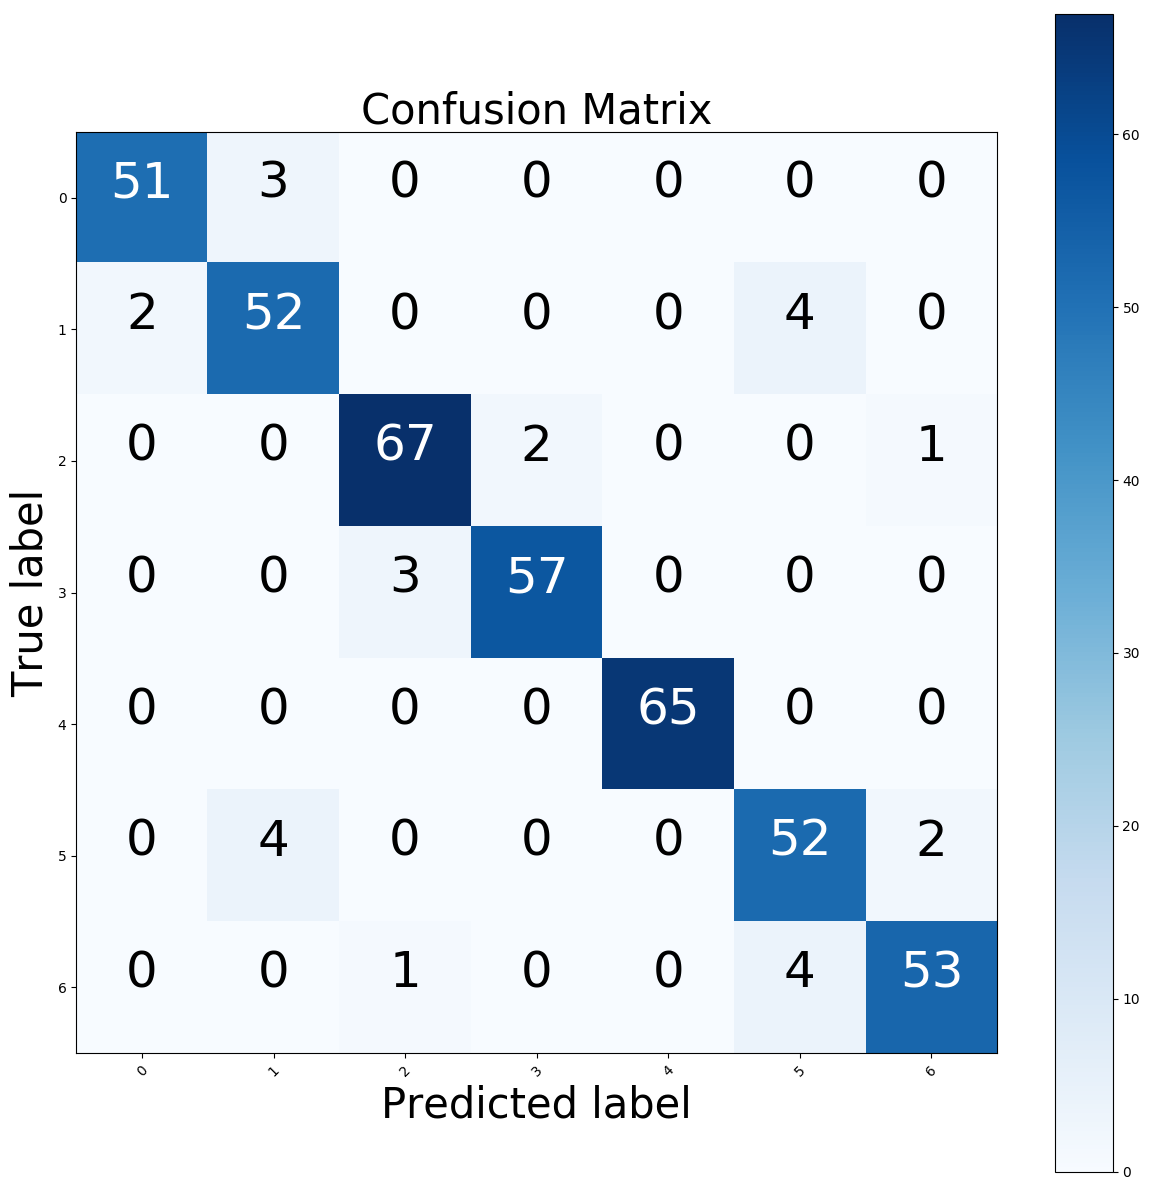

In [19]:
from sklearn.metrics import confusion_matrix

# calculate
confusion_matrix = confusion_matrix(testing_y, testing_y_pred)
normed_confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
num_classes = np.unique(classes)

cmap=plt.cm.Blues
plt.close()
plt.figure(figsize=(12, 12))
plt.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title('Confusion Matrix', fontsize=30)
plt.colorbar()
tick_marks = np.arange(len(num_classes))
plt.xticks(tick_marks, num_classes, rotation=45)
plt.yticks(tick_marks, num_classes)
plt.tight_layout()

fmt = 'd'
thresh = confusion_matrix.max() / 2.0

for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
    plt.text(j, i, format(confusion_matrix[i, j], fmt),
             horizontalalignment="center",
             color='white' if confusion_matrix[i, j] > thresh else "black",
            size=36)

plt.tight_layout()
plt.ylabel('True label', fontsize=30)
plt.xlabel('Predicted label', fontsize=30)




Text(0.5,109.486,'Predicted label')

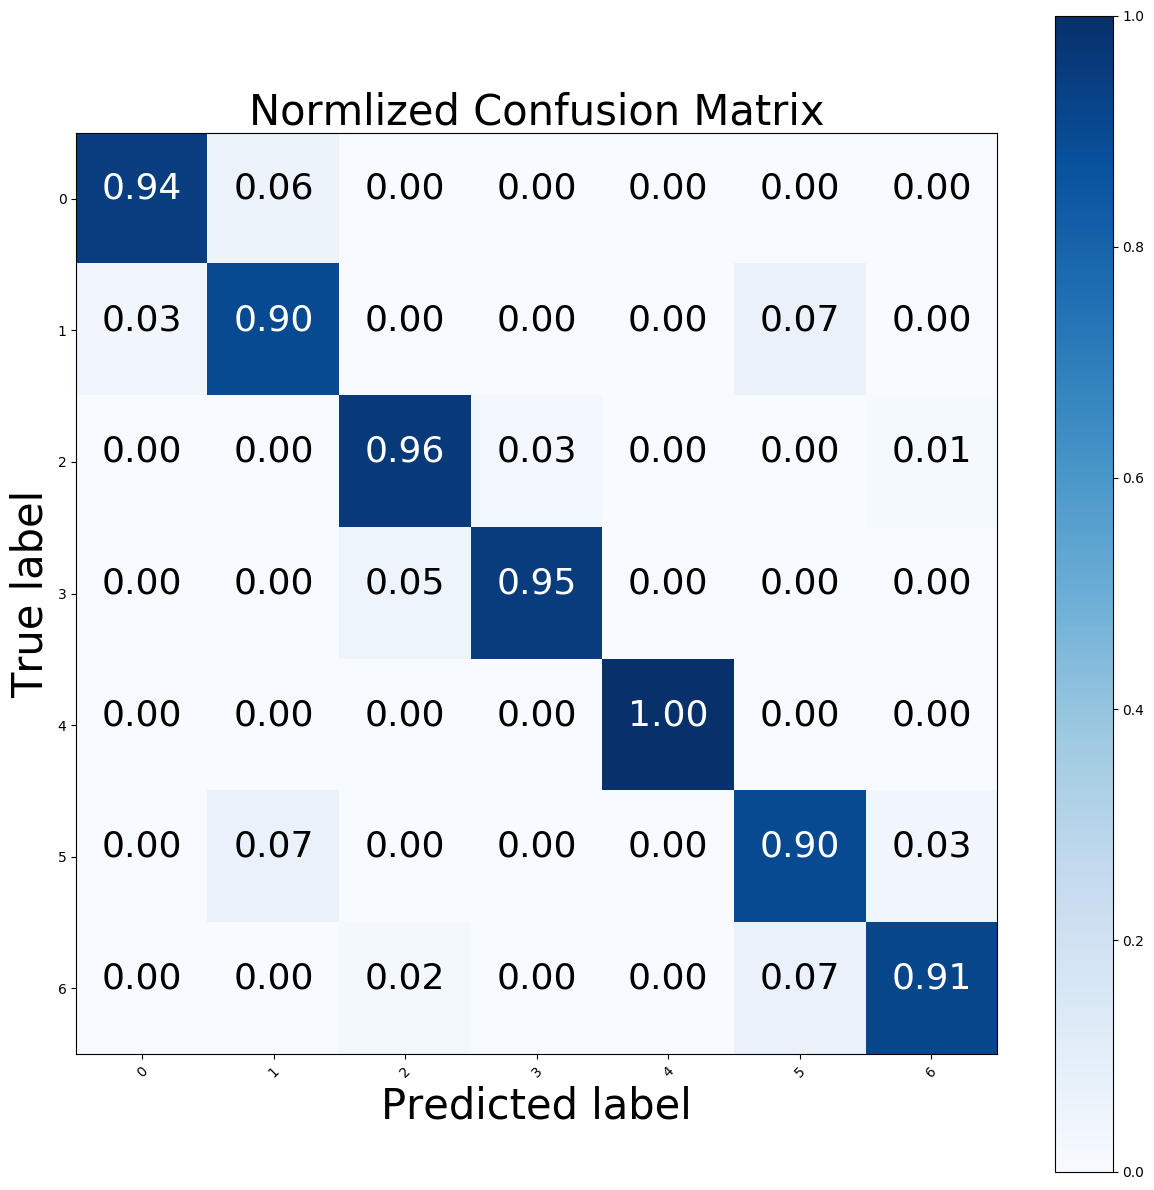

In [21]:
plt.close()
plt.figure(figsize=(12, 12))
plt.imshow(normed_confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title('Normlized Confusion Matrix', fontsize=30)
plt.colorbar()
tick_marks = np.arange(len(num_classes))
plt.xticks(tick_marks, num_classes, rotation=45)
plt.yticks(tick_marks, num_classes)
plt.tight_layout()

fmt = '.2f'
thresh = confusion_matrix.max() / 2.0
for i, j in itertools.product(range(normed_confusion_matrix.shape[0]), range(normed_confusion_matrix.shape[1])):
    plt.text(j, i, format(normed_confusion_matrix[i, j], fmt),
             horizontalalignment="center",
             color='white' if confusion_matrix[i, j] > thresh else "black",
            size=26)

plt.tight_layout()
plt.ylabel('True label', fontsize=30)
plt.xlabel('Predicted label', fontsize=30)

# Learning Curve

In [44]:
train_sizes = np.append(np.linspace(0.05, 0.1, 20, endpoint=False),
                            np.linspace(0.1, 1, 20, endpoint=True))

# calculate

# balanced accuracy
# balanced_accuracy_train_sizes, balanced_accuracy_train_scores, balanced_accuracy_test_scores = sklearn.model_selection.learning_curve(
#     best_estimator,
#     training_x,
#     training_y,
#     cv=5,
#     train_sizes=train_sizes,
#     verbose=10,
#     scoring=make_scorer(balanced_accuracy),
#     n_jobs=4,
#     random_state=seed)


# unbalanced accuracy
accuracy_train_sizes, accuracy_train_scores, accuracy_test_scores = sklearn.model_selection.learning_curve(
    best_estimator,
    training_x,
    training_y,
    cv=5,
    train_sizes=train_sizes,
    verbose=10,
    scoring=make_scorer(accuracy_score),
    n_jobs=4,
    random_state=seed)

# # precision
# precision_train_sizes, precision_train_scores, precision_test_scores = sklearn.model_selection.learning_curve(
#     best_estimator,
#     training_x,
#     training_y,
#     cv=5,
#     train_sizes=train_sizes,
#     verbose=10,
#     scoring=make_scorer(precision_score),
#     n_jobs=4,
#     random_state=seed)

# # recall
# recall_train_sizes, recall_train_scores, recall_test_scores = sklearn.model_selection.learning_curve(
#     best_estimator,
#     training_x,
#     training_y,
#     cv=5,
#     train_sizes=train_sizes,
#     verbose=10,
#     scoring=make_scorer(recall_score),
#     n_jobs=4,
#     random_state=seed)

# # roc_auc accuracy
# roc_auc_train_sizes, roc_auc_train_scores, roc_auc_test_scores = sklearn.model_selection.learning_curve(
#     best_estimator,
#     training_x,
#     training_y,
#     cv=5,
#     train_sizes=train_sizes,
#     verbose=10,
#     scoring=make_scorer(roc_auc_score),
#     n_jobs=4,
#     random_state=seed)




[learning_curve] Training set sizes: [  67   70   74   77   80   84   87   90   94   97  101  104  107  111
  114  117  121  124  127  131  134  198  262  326  389  453  517  581
  645  708  772  836  900  964 1027 1091 1155 1219 1283 1347]
[CV]  ................................................................
[CV] ....................... , score=0.6774193548387096, total=   0.0s
[CV]  ................................................................
[CV]  ................................................................[CV] ....................... , score=0.6803519061583577, total=   0.0s

[CV]  ................................................................[CV]  ................................................................[CV] ....................... , score=0.6832844574780058, total=   0.0s[CV]  ................................................................



[CV] ....................... , score=0.7008797653958945, total=   0.0s[CV] ....................... , score=0.57184750733

[Parallel(n_jobs=4)]: Batch computation too fast (0.1283s.) Setting batch_size=2.
[Parallel(n_jobs=4)]: Done  12 out of 200 | elapsed:    0.3s remaining:    4.2s


[CV]  ................................................................[CV] ....................... , score=0.8093841642228738, total=   0.0s[CV] ....................... , score=0.8357771260997068, total=   0.0s[CV]  ................................................................



[CV]  ................................................................[CV] ........................ , score=0.873900293255132, total=   0.0s[CV]  ................................................................


[CV] ....................... , score=0.8299120234604106, total=   0.0s[CV]  ................................................................
[CV] ....................... , score=0.9149560117302052, total=   0.0s
[CV] ....................... , score=0.9149560117302052, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.9266862170087976, total=   0.0s[CV]  ................................................................

[CV]  .

[Parallel(n_jobs=4)]: Done  33 out of 200 | elapsed:    0.5s remaining:    2.6s


[CV]  ................................................................[CV]  ................................................................



[CV]  ................................................................[CV] ....................... , score=0.6823529411764706, total=   0.0s
[CV] ....................... , score=0.6676470588235294, total=   0.0s[CV] ....................... , score=0.6588235294117647, total=   0.0s


[CV] ....................... , score=0.7029411764705882, total=   0.0s[CV]  ................................................................
[CV]  ................................................................[CV]  ................................................................


[CV]  ................................................................
[CV] ....................... , score=0.6705882352941176, total=   0.0s[CV] ....................... , score=0.6852941176470588, total=   0.0s[CV] ....................... , score=0.7029411764705882, total=   0.0s


[CV]

[Parallel(n_jobs=4)]: Done  54 out of 200 | elapsed:    0.8s remaining:    2.1s




[CV]  ................................................................[CV] ...................................... , score=0.9, total=   0.0s
[CV]  ................................................................[CV]  ................................................................


[CV]  ................................................................[CV] ...................................... , score=0.9, total=   0.0s

[CV] ........................ , score=0.888235294117647, total=   0.0s[CV] ....................... , score=0.9088235294117647, total=   0.0s[CV]  ................................................................


[CV]  ................................................................[CV] ........................ , score=0.888235294117647, total=   0.0s[CV]  ................................................................


[CV] ....................... , score=0.8852941176470588, total=   0.0s[CV]  ................................................................

[CV]

[Parallel(n_jobs=4)]: Done  75 out of 200 | elapsed:    1.1s remaining:    1.8s


[CV]  ................................................................[CV] ........................ , score=0.712166172106825, total=   0.0s
[CV] ....................... , score=0.6913946587537092, total=   0.0s

[CV]  ................................................................
[CV]  ................................................................
[CV] ....................... , score=0.7032640949554896, total=   0.0s[CV]  ................................................................


[CV]  ................................................................[CV] ....................... , score=0.6913946587537092, total=   0.0s[CV] ....................... , score=0.6943620178041543, total=   0.0s


[CV] ....................... , score=0.7359050445103857, total=   0.0s[CV]  ................................................................[CV] ....................... , score=0.7359050445103857, total=   0.0s[CV]  ................................................................



[CV] 

[Parallel(n_jobs=4)]: Done  96 out of 200 | elapsed:    1.3s remaining:    1.4s


[CV] ....................... , score=0.9584569732937686, total=   0.0s[CV]  ................................................................[CV]  ................................................................[CV] ....................... , score=0.9406528189910979, total=   0.0s



[CV]  ................................................................[CV]  ................................................................

[CV] ....................... , score=0.6190476190476191, total=   0.0s[CV] ....................... , score=0.6607142857142857, total=   0.0s

[CV] ....................... , score=0.9554896142433235, total=   0.0s[CV]  ................................................................[CV] ....................... , score=0.9554896142433235, total=   0.0s[CV]  ................................................................


[CV]  ................................................................
[CV]  ................................................................[CV] ...

[Parallel(n_jobs=4)]: Done 117 out of 200 | elapsed:    1.5s remaining:    1.1s
[Parallel(n_jobs=4)]: Done 138 out of 200 | elapsed:    1.7s remaining:    0.8s


[CV]  ................................................................[CV]  ................................................................



[CV] ....................... , score=0.6904761904761905, total=   0.0s[CV] ....................... , score=0.7023809523809523, total=   0.0s[CV] ....................... , score=0.7142857142857143, total=   0.0s[CV] ....................... , score=0.7946428571428571, total=   0.0s



[CV]  ................................................................[CV]  ................................................................[CV]  ................................................................
[CV]  ................................................................


[CV] ....................... , score=0.8214285714285714, total=   0.0s[CV] ....................... , score=0.8571428571428571, total=   0.0s
[CV] ....................... , score=0.8839285714285714, total=   0.0s
[CV] ....................... , score=0.8482142857142857, total=   0.0s
[CV] 

[Parallel(n_jobs=4)]: Done 159 out of 200 | elapsed:    2.0s remaining:    0.5s


[CV]  ................................................................[CV]  ................................................................[CV]  ................................................................



[CV] ....................... , score=0.6916167664670658, total=   0.0s[CV] ....................... , score=0.7065868263473054, total=   0.0s[CV] ....................... , score=0.7305389221556886, total=   0.0s[CV] ....................... , score=0.8083832335329342, total=   0.0s

[CV]  ................................................................

[CV]  ................................................................[CV]  ................................................................

[CV]  ................................................................

[CV] ....................... , score=0.8802395209580839, total=   0.0s[CV] ....................... , score=0.8413173652694611, total=   0.0s

[CV] ....................... , score=0.8922155688622755, total=   0.0s[CV] .

[Parallel(n_jobs=4)]: Done 180 out of 200 | elapsed:    2.2s remaining:    0.2s


[CV] ....................... , score=0.9461077844311377, total=   0.0s[CV] ....................... , score=0.9401197604790419, total=   0.0s[CV]  ................................................................



[CV] ....................... , score=0.9341317365269461, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.9341317365269461, total=   0.0s


[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    2.6s finished


In [45]:
# # plot
# plt.close()
# plt.figure(figsize=(12, 12))
# plt.title('Balanced Accuracy Learning Curve', fontsize=35)

# plt.xlabel('Training examples (count)', fontsize=30)
# plt.ylabel('Balanced Accuracy (0.0 - 1.0)', fontsize=30)
# plt.grid()
# plt.tight_layout()

# train_scores = balanced_accuracy_train_scores
# test_scores = balanced_accuracy_test_scores
# train_sizes = balanced_accuracy_train_sizes

# train_points = train_scores
# test_points = test_scores

# ax = plt.gca()
# ax.set_xscale("linear")
# ax.set_yscale("linear")

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                  test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#          label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#          label="Cross-validation score")

# plt.legend(loc="best")

# # ---------------------------------------------------------------


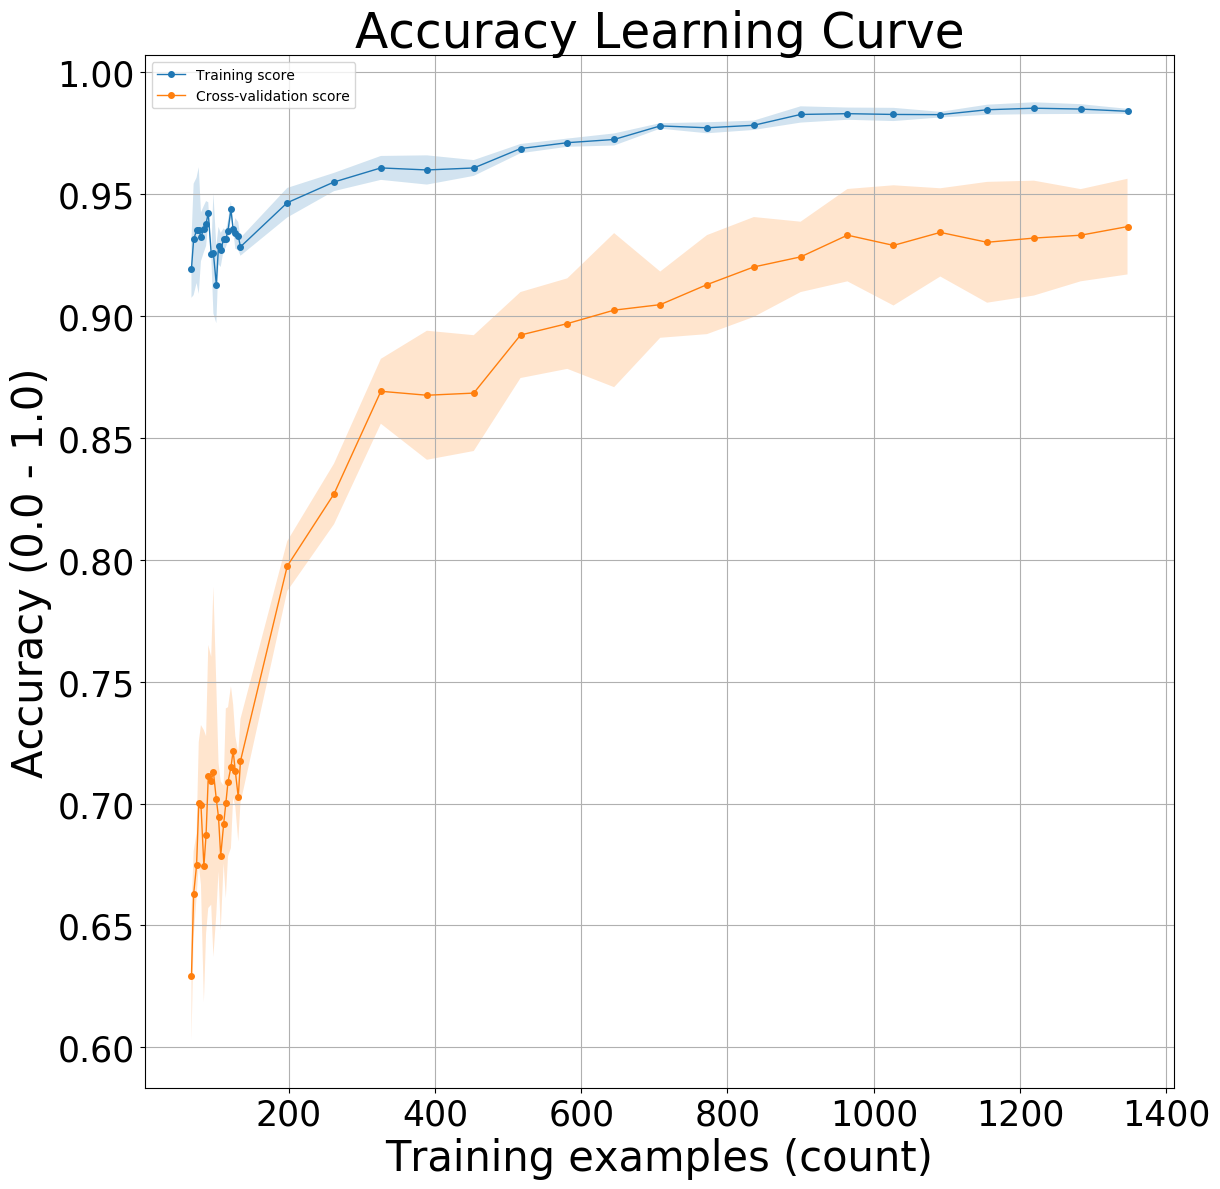

In [46]:
plt.close()
plt.figure(figsize=(12, 12))
plt.tick_params(labelsize=25)

plt.title('Accuracy Learning Curve', fontsize=35)

plt.xlabel('Training examples (count)', fontsize=30)
plt.ylabel('Accuracy (0.0 - 1.0)', fontsize=30)
plt.grid()
plt.tight_layout()

train_scores = accuracy_train_scores
test_scores = accuracy_test_scores
train_sizes = accuracy_train_sizes

train_points = train_scores
test_points = test_scores

ax = plt.gca()
ax.set_xscale("linear")
ax.set_yscale("linear")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
train_points = train_scores_mean
test_points = test_scores_mean

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2)

plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
         label="Training score")
plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
         label="Cross-validation score")

plt.legend(loc="best")


# ---------------------------------------------------------------


In [54]:
# print(train_sizes)
# print(train_scores_mean)
# print(test_scores_mean)


[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
[0.64766606 0.75633832 0.84048629 0.91305404 0.95646828 0.97808441
 0.98282002 0.98385662 0.98385662 0.98385662 0.98385662 0.98385662
 0.98385662 0.98385662 0.98385662 0.98385662 0.98385662 0.98385662
 0.98385662 0.98385662 0.98385662 0.98385662 0.98385662 0.98385662
 0.98385662 0.98385662 0.98385662 0.98385662 0.98385662 0.98385662
 0.98385662 0.98385662 0.98385662 0.98385662 0.98385662 0.98385662
 0.98385662 0.98385662 0.98385662 0.98385662 0.98385662 0.98385662
 0.98385662 0.98385662 0.98385662 0.98385662 0.98385662]
[0.62576737 0.72694027 0.80689219 0.87448201 0.91234504 0.93074189
 0.9360891  0.93191704 0.93429982 0.9360749  0.93251764 0.93251231
 0.93665785 0.93251768 0.93429809 0.93607318 0.93310242 0.93250886
 0.93606789 0.93251595 0.93312335 0.93548667 0.9319294  0.93192407
 0.93606961 0.93726022 0.93429286 0.93191544 0.93370811 0.9331

In [57]:
# # ob_train_sizes = [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
# #  27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
# ob_train_scores = [0.64766606, 0.75633832, 0.84048629, 0.91305404, 0.95646828, 0.97808441,
#  0.98282002, 0.98385662, 0.98385662, 0.98385662, 0.98385662, 0.98385662,
#  0.98385662, 0.98385662, 0.98385662, 0.98385662, 0.98385662, 0.98385662,
#  0.98385662, 0.98385662, 0.98385662, 0.98385662, 0.98385662, 0.98385662,
#  0.98385662, 0.98385662, 0.98385662, 0.98385662, 0.98385662, 0.98385662,
#  0.98385662, 0.98385662, 0.98385662, 0.98385662, 0.98385662, 0.98385662,
#  0.98385662, 0.98385662, 0.98385662, 0.98385662, 0.98385662, 0.98385662,
#  0.98385662, 0.98385662, 0.98385662, 0.98385662, 0.98385662,]
# ob_test_scores = [0.62576737, 0.72694027, 0.80689219, 0.87448201, 0.91234504, 0.93074189,
#                   0.9360891,  0.93191704, 0.93429982, 0.9360749,  0.93251764, 0.93251231,
#  0.93665785, 0.93251768, 0.93429809, 0.93607318, 0.93310242, 0.93250886,
#  0.93606789, 0.93251595, 0.93312335, 0.93548667, 0.9319294,  0.93192407,
#  0.93606961, 0.93726022, 0.93429286, 0.93191544, 0.93370811, 0.93311982,
#  0.9342943,  0.93252275, 0.92955365, 0.93370811, 0.93429629, 0.93547077,
#  0.93605918, 0.93488281, 0.93191371, 0.9342929,  0.93546758, 0.93664207,
#  0.93605746, 0.93546932, 0.93074069, 0.93370811, 0.93429629,]

In [48]:
# plt.close()
# plt.figure(figsize=(12, 12))

# plt.title('Recall Accuracy Learning Curve')

# plt.xlabel('Training examples (count)')
# plt.ylabel('Accuracy (0.0 - 1.0)')
# plt.grid()
# plt.tight_layout()

# train_scores = recall_train_scores
# test_scores = recall_test_scores
# train_sizes = recall_train_sizes

# train_points = train_scores
# test_points = test_scores

# ax = plt.gca()
# ax.set_xscale("linear")
# ax.set_yscale("linear")

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                  test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#          label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#          label="Cross-validation score")

# plt.legend(loc="best")


# # -------------------------------------------


In [49]:
# plt.close()
# plt.figure(figsize=(12, 12))
# plt.title('ROC-AUC Accuracy Learning Curve')
# plt.xlabel('Training examples (count)')
# plt.ylabel('Accuracy (0.0 - 1.0)')
# plt.grid()
# plt.tight_layout()

# train_scores = roc_auc_train_scores
# test_scores = roc_auc_test_scores
# train_sizes = roc_auc_train_sizes

# train_points = train_scores
# test_points = test_scores

# ax = plt.gca()
# ax.set_xscale("linear")
# ax.set_yscale("linear")

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                  test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#          label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#          label="Cross-validation score")

# plt.legend(loc="best")

# Compelxity Param: Max Depth

In [50]:
# balanced_accuracy_train_scores, balanced_accuracy_test_scores = sklearn.model_selection.validation_curve(best_estimator,training_x, training_y, "max_depth", max_depth, cv=5,
#                                                  scoring=data1_scorer, n_jobs=4)

accuracy_train_scores, accuracy_test_scores = sklearn.model_selection.validation_curve(best_estimator,training_x, training_y, "max_depth", max_depth, cv=5,
                                                 scoring=make_scorer(accuracy_score), n_jobs=4)

# precision_train_scores, precision_test_scores = sklearn.model_selection.validation_curve(best_estimator,training_x, training_y, "max_depth", max_depth, cv=5,
#                                                  scoring=make_scorer(precision_score), n_jobs=4)

# recall_train_scores, recall_test_scores = sklearn.model_selection.validation_curve(best_estimator,training_x, training_y, "max_depth", max_depth, cv=5,
#                                                  scoring=make_scorer(recall_score), n_jobs=4)

# roc_auc_train_scores, roc_auc_test_scores = sklearn.model_selection.validation_curve(best_estimator,training_x, training_y, "max_depth", max_depth, cv=5,
#                                                  scoring=make_scorer(roc_auc_score), n_jobs=4)

In [51]:
# plt.close('all')
# plt.figure()
# plt.title('Model Complexity Curve: max_depth')

# plt.xlabel('Training examples (count)')
# plt.ylabel('Accuracy (0.0 - 1.0)')
# plt.grid()
# plt.tight_layout()

# train_scores = balanced_accuracy_train_scores
# test_scores = balanced_accuracy_test_scores
# train_sizes = max_depth

# train_points = train_scores
# test_points = test_scores
# ax = plt.gca()
# x_scale = 'linear'
# y_scale = 'linear'

# ax.set_xscale(x_scale)
# ax.set_yscale(y_scale)

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#      label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#      label="Cross-validation score")

# plt.legend(loc="best")
# plt.tight_layout()

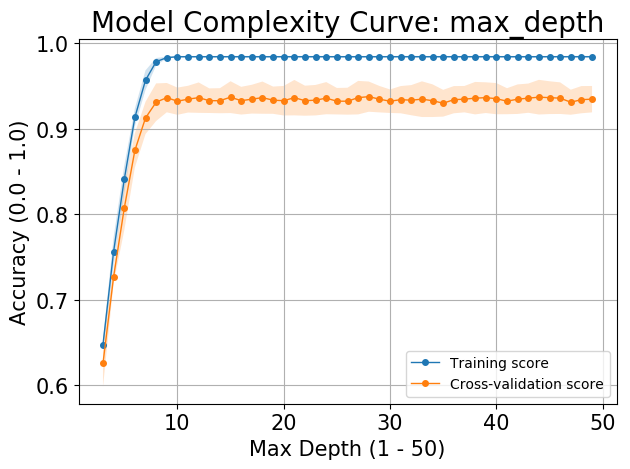

In [52]:
plt.close('all')
plt.figure()
plt.tick_params(labelsize=15)

plt.title('Model Complexity Curve: max_depth', fontsize=20)

plt.xlabel('Max Depth (1 - 50)', fontsize=15)
plt.ylabel('Accuracy (0.0 - 1.0)', fontsize=15)
plt.grid()
plt.tight_layout()

train_scores = accuracy_train_scores
test_scores = accuracy_test_scores
train_sizes = max_depth

train_points = train_scores
test_points = test_scores
ax = plt.gca()
x_scale = 'linear'
y_scale = 'linear'

ax.set_xscale(x_scale)
ax.set_yscale(y_scale)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
train_points = train_scores_mean
test_points = test_scores_mean

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2)

plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
     label="Training score")
plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
     label="Cross-validation score")

plt.legend(loc="best")
plt.tight_layout()


In [ ]:
# plt.close('all')
# plt.figure()
# plt.title('Model Complexity Curve: max_depth')

# plt.xlabel('Training examples (count)')
# plt.ylabel('Accuracy (0.0 - 1.0)')
# plt.grid()
# plt.tight_layout()

# train_scores = precision_train_scores
# test_scores = precision_test_scores
# train_sizes = max_depth

# train_points = train_scores
# test_points = test_scores
# ax = plt.gca()
# x_scale = 'linear'
# y_scale = 'linear'

# ax.set_xscale(x_scale)
# ax.set_yscale(y_scale)

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#      label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#      label="Cross-validation score")

# plt.legend(loc="best")
# plt.tight_layout()

In [ ]:
# plt.close('all')
# plt.figure()
# plt.title('Model Complexity Curve: max_depth')

# plt.xlabel('Training examples (count)')
# plt.ylabel('Accuracy (0.0 - 1.0)')
# plt.grid()
# plt.tight_layout()

# train_scores = recall_train_scores
# test_scores = recall_test_scores
# train_sizes = max_depth

# train_points = train_scores
# test_points = test_scores
# ax = plt.gca()
# x_scale = 'linear'
# y_scale = 'linear'

# ax.set_xscale(x_scale)
# ax.set_yscale(y_scale)

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#      label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#      label="Cross-validation score")

# plt.legend(loc="best")
# plt.tight_layout()

In [25]:
# plt.close('all')
# plt.figure()
# plt.title('Model Complexity Curve: max_depth')

# plt.xlabel('Training examples (count)')
# plt.ylabel('Accuracy (0.0 - 1.0)')
# plt.grid()
# plt.tight_layout()

# train_scores = roc_auc_train_scores
# test_scores = roc_auc_test_scores
# train_sizes = max_depth

# train_points = train_scores
# test_points = test_scores
# ax = plt.gca()
# x_scale = 'linear'
# y_scale = 'linear'

# ax.set_xscale(x_scale)
# ax.set_yscale(y_scale)

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#      label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#      label="Cross-validation score")

# plt.legend(loc="best")
# plt.tight_layout()

# Timing Curve

In [60]:
from time import clock


sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
tests = 5
out = dict()
out['train'] = np.zeros(shape=(len(sizes), tests))
out['test'] = np.zeros(shape=(len(sizes), tests))

for i, frac in enumerate(sizes):
    for j in range(tests):
        np.random.seed(seed)
        x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(training_x, training_y, test_size=1 - frac, random_state=seed)
        st = clock()
        best_estimator.fit(x_train, y_train)
        out['train'][i, j] = (clock() - st)
        st = clock()
        best_estimator.predict(x_test)
        out['test'][i, j] = (clock() - st)


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  app.launch_new_instance()
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time

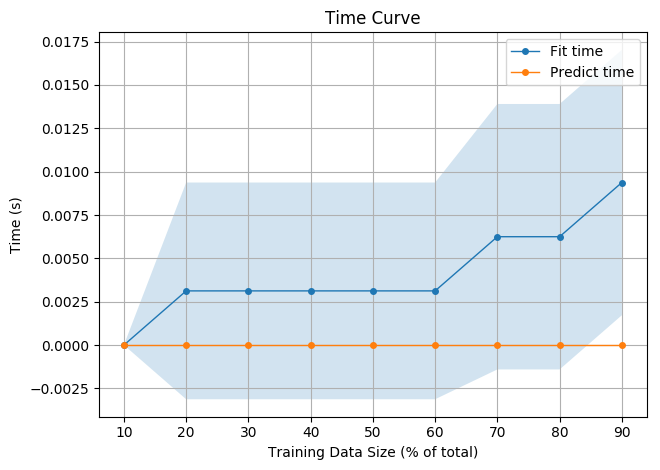

In [61]:
plt.close()
plt.figure()
plt.title("Time Curve")

plt.xlabel("Training Data Size (% of total)")
plt.ylabel("Time (s)")
fit_scores_mean = np.mean(out['train'], axis=1)
fit_scores_std = np.std(out['train'], axis=1)
predict_scores_mean = np.mean(out['test'], axis=1)
predict_scores_std = np.std(out['test'], axis=1)
plt.grid()
plt.tight_layout()

plt.fill_between(np.array(sizes) * 100, fit_scores_mean - fit_scores_std,
                 fit_scores_mean + fit_scores_std, alpha=0.2)
plt.fill_between(np.array(sizes) * 100, predict_scores_mean - predict_scores_std,
                 predict_scores_mean + predict_scores_std, alpha=0.2)
plt.plot(np.array(sizes) * 100, fit_scores_mean, 'o-', linewidth=1, markersize=4,
         label="Fit time")
plt.plot(np.array(sizes) * 100, predict_scores_mean, 'o-', linewidth=1, markersize=4,
         label="Predict time")

plt.legend(loc="best")

In [62]:
print(fit_scores_mean)
print(predict_scores_mean)

[0.       0.003125 0.003125 0.003125 0.003125 0.003125 0.00625  0.00625
 0.009375]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [59]:
name = ["DT", "NN", "Boost", "SVM", "KNN"]
ob_train_acc = [0.9876, 0.9988, 1.0, 0.9686, 1.0]
ob_test_acc = [0.9385,0.9598,0.9811,0.9645,0.8629]

ad_train_acc = [0.8094,0.7850,0.8146,0.8340,0.7687]
ad_test_acc = [0.7747,0.7870,0.7549,0.8237,0.7631]


In [ ]:
plt.close()
plt.figure()
plt.title("Accuracy Compasion")

fit_scores_mean = np.mean(out['train'], axis=1)
fit_scores_std = np.std(out['train'], axis=1)
predict_scores_mean = np.mean(out['test'], axis=1)
predict_scores_std = np.std(out['test'], axis=1)
plt.grid()
plt.tight_layout()

plt.fill_between(np.array(sizes) * 100, fit_scores_mean - fit_scores_std,
                 fit_scores_mean + fit_scores_std, alpha=0.2)
plt.fill_between(np.array(sizes) * 100, predict_scores_mean - predict_scores_std,
                 predict_scores_mean + predict_scores_std, alpha=0.2)
plt.plot(np.array(sizes) * 100, fit_scores_mean, 'o-', linewidth=1, markersize=4,
         label="Fit time")
plt.plot(np.array(sizes) * 100, predict_scores_mean, 'o-', linewidth=1, markersize=4,
         label="Predict time")

plt.legend(loc="best")